# Market Basket Analysis

## Introduction to MBA

### If This, Then That

Market Basket Analysis explores the *associative rules* between different items in a customer’s basket. For example, if a grocery store shopper buys bread, they may be more likely to buy butter — or vice versa. Market Basket Analysis helps determine the likelihood that the selection of one product, the **antecedent** $X$, leads to the selection of another item, the **consequent** $Y$:

$$
X \rightarrow Y
$$

Going forward, take this set of twelve grocery store transactions as a simplified example:

| Transaction | Items                                 |
|-------------|---------------------------------------|
| 1           | milk, egg, bread, butter              |
| 2           | milk, butter, egg, ketchup, butter    |
| 3           | bread, butter, ketchup                |
| 4           | milk, bread, butter                   |
| 5           | bread, butter, cookies                |
| 6           | milk, bread, butter, cookies          |
| 7           | milk, cookies                         |
| 8           | milk, bread, butter                   |
| 9           | bread, butter, egg, cookies           |
| 10          | milk, butter, bread                   |
| 11          | milk, bread                           |
| 12          | milk, bread, cookies, ketchup         |

## Metrics

### Frequency

**Frequency** refers to the number of transactions that include a given item or itemset. The frequency of any item $X$ is represented as follows:

$$
Frequency(X)
$$

In our simplified transaction example, there are 6 unique items with the following frequencies:

|    | item    |   frequency |
|---:|:--------|------------:|
|  0 | milk    |           9 |
|  1 | egg     |           3 |
|  2 | bread   |          10 |
|  3 | butter  |          10 |
|  4 | ketchup |           3 |
|  5 | cookies |           5 |

### Support

**Support** is essentially the previous count metric, defined as a percentage of all transactions:

$$
Support(X) = \frac{Frequency(X)}{N}
$$

In simpler terms, the support of any item $X$ is the number of transactions containing that item ($Frequency(X)$) divided by the total number of transactions, $N$.

|    | item    |   frequency |   support |
|---:|:--------|------------:|----------:|
|  0 | milk    |           9 |      0.75 |
|  1 | egg     |           3 |      0.25 |
|  2 | bread   |          10 |      0.83 |
|  3 | butter  |          10 |      0.83 |
|  4 | ketchup |           3 |      0.25 |
|  5 | cookies |           5 |      0.42 |

Support can be a tricky metric to benchmark, as stores with different product lines will have different standards for what qualifies as "high" support. It often comes down to familiarity with the data and the environment in which it’s being applied.

Let’s say you run a balloon store and carry three types of balloons: yellow, green, and blue. One day, you record 8 different transactions, each selling one item. You tally up the end-of-day sales as **3** yellow balloons, **1** green balloon, and **4** blue balloons. Your support for blue balloons on this day is **50%**. On another day, you begin carrying red balloons, attracting new prospective customers. Your daily sales are exactly the same as before, with the addition of **2** red balloons. Despite your total balloon sales being 1.25 times greater, your support for blue balloons has now dropped to **40%**. This is because *support is relative*.

Essentially, the greater the number of different products sold, the lower the support any typical item would be expected to have (assuming a consistent distribution of sales). With a more diverse selection of products, you can expect to have lower support for each product. On the other hand, if you only sell a single product, the support for that product will be 100%.

Support can also be applied to combinations of itemsets within the same transaction(s). For itemsets containing only 2 items, $X$ and $Y$, support can be written as:

$$
Support(X \cap Y) = \frac{Frequency(X \cap Y)}{N}
$$

Where $Frequency(X \cap Y)$ is the count of transactions that contain *both* products $X$ and $Y$, and $N$ is the total number of transactions. Note that the support between two items of the same itemset remains the same, regardless of whether one is an antecedent or consequent; i.e., $Support(X \rightarrow Y) = Support(Y \rightarrow X)$.

| Itemset                |   Support |
|:-----------------------|----------:|
| ('bread', 'butter')    |      0.67 |
| ('bread', 'milk')      |      0.58 |
| ('butter', 'milk')     |      0.58 |
| ('butter', 'egg')      |      0.33 |
| ('bread', 'cookies')   |      0.33 |
| ('butter', 'ketchup')  |      0.25 |
| ('butter', 'cookies')  |      0.25 |
| ('cookies', 'milk')    |      0.25 |
| ('bread', 'egg')       |      0.17 |
| ('egg', 'milk')        |      0.17 |
| ('ketchup', 'milk')    |      0.17 |
| ('bread', 'ketchup')   |      0.17 |
| ('butter', 'butter')   |      0.08 |
| ('egg', 'ketchup')     |      0.08 |
| ('cookies', 'egg')     |      0.08 |
| ('cookies', 'ketchup') |      0.08 |

### Confidence

**Confidence** measures how often a consequent item is bought, given that an antecedent item has been purchased. $Confidence(X \rightarrow Y)$ is the probability that Item $Y$ will be purchased, given the purchase of Item $X$.

$$
Confidence(X \rightarrow Y) = \frac{Support(X \cap Y)}{Support(X)}
$$

Confidence is a strong rule to follow, but it is also heavily biased towards consequent items with high support values. In other words, confidence is typically higher for rules where the predicted item(s) are common, regardless of whether a strong association exists. This is where context from other metrics becomes helpful.

Here is what the confidence looks like for various rules in our earlier set of transactions:

| Antecedents   | Consequents   |   Confidence |\|| Antecedents   | Consequents   |   Confidence |
|:--------------|:--------------|----------:|---|:--------------|:--------------|----------:|
| Egg           | Butter        |  1        |\|| Bread         | Cookies       |  0.4      |
| Butter        | Bread         |  0.888889 |\|| Egg           | Ketchup       |  0.333333 |
| Bread         | Butter        |  0.8      |\|| Butter        | Cookies       |  0.333333 |
| Cookies       | Bread         |  0.8      |\|| Ketchup       | Egg           |  0.333333 |
| Milk          | Bread         |  0.777778 |\|| Butter        | Egg           |  0.333333 |
| Bread         | Milk          |  0.7      |\|| Ketchup       | Cookies       |  0.333333 |
| Ketchup       | Butter        |  0.666667 |\|| Egg           | Cookies       |  0.333333 |
| Ketchup       | Bread         |  0.666667 |\|| Milk          | Cookies       |  0.333333 |
| Egg           | Bread         |  0.666667 |\|| Milk          | Ketchup       |  0.222222 |
| Egg           | Milk          |  0.666667 |\|| Milk          | Egg           |  0.222222 |
| Ketchup       | Milk          |  0.666667 |\|| Butter        | Ketchup       |  0.222222 |
| Milk          | Butter        |  0.666667 |\|| Bread         | Ketchup       |  0.2      |
| Butter        | Milk          |  0.666667 |\|| Bread         | Egg           |  0.2      |
| Cookies       | Butter        |  0.6      |\|| Cookies       | Egg           |  0.2      |
| Cookies       | Milk          |  0.6      |\|| Cookies       | Ketchup       |  0.2      |

You’ll notice that this table is much longer than the prior support table. That is because confidence is a "directional" metric, meaning that order matters. In terms of probability, confidence operates off of *permutations* of antecedent-consequent pairings, instead of *combinations* alone. This means that the number of different antecedent-consequent selections will often be exponentially higher than the number of itemset combinations calculated in a support table. 

In a scenario with 6 items and itemsets of length 2, the number of possible combinations is 15, and the number of possible permutations is 30. For itemsets of length 3, the number of antecedent-consequent pairings can be *over* 20 combinations and 120 permutations ("over" because we’re effectively performing combination formulas on top of other combination/permutation formulas; "{bread, milk} → {butter}" is a different rule from "{bread} → {milk, butter}").

As baskets incorporate more and more products, the ways to build various antecedent-consequent rule combinations will skyrocket to a point where it becomes nonviable. We’ll discuss how to deal with this later on.

### Lift

**Lift** measures the strength of the association between $X$ and $Y$, compared to when the two items or itemsets are independent. It is calculated as the ratio of the observed support to the expected support if the items were selected independently. In simpler terms, it tells us how much more or less likely two associated items are to be bought together than by chance.

$$
Lift(X \cap Y) = \frac{Support(X \cap Y)}{Support(X) \times Support(Y)}
$$

$$\text{or}$$

$$
Lift(X \cap Y) = \frac{\text{Observed Support}}{\text{Expected Support}}
$$

The support values in this formula can also be thought of in terms of probability: $P(X)$, $P(Y)$, and $P(X \cap Y)$. The value of lift relative to 1 indicates the degree of association or disassociation ( * "disassociation" meaning that purchasing one indicates the other *won't* be purchased).

- **Lift > 1**: The items are positively associated, meaning the occurrence of one item increases the likelihood of the other item being purchased.
- **Lift = 1**: The items are independent, meaning there's no association between them.
- **Lift < 1**: The items are negatively associated, meaning the occurrence of one item decreases the likelihood of the other item being purchased.

Lift is not directional, so it does not matter which items in a set represent the antecedent(s) or consequent(s). Like support, the lift values of the rules "$X \rightarrow Y$" and "$Y \rightarrow X$" are equivalent.

| Antecedents           | Consequents           |   Lift   |\|| Antecedents           | Consequents           |   Lift   |
|:----------------------|:----------------------|:---------|---|:----------------------|:----------------------|:---------|
| Egg                   | Ketchup               |  1.33333 |\|| Milk                  | Ketchup               |  0.88889 |
| Egg                   | Butter                |  1.33333 |\|| Butter                | Milk                  |  0.88889 |
| Butter                | Egg                   |  1.33333 |\|| Milk                  | Butter                |  0.88889 |
| Ketchup               | Egg                   |  1.33333 |\|| Ketchup               | Cookies               |  0.8     |
| Butter                | Bread                 |  1.06667 |\|| Bread                 | Egg                   |  0.8     |
| Bread                 | Butter                |  1.06667 |\|| Ketchup               | Bread                 |  0.8     |
| Bread                 | Cookies               |  0.96    |\|| Bread                 | Ketchup               |  0.8     |
| Cookies               | Bread                 |  0.96    |\|| Egg                   | Bread                 |  0.8     |
| Bread                 | Milk                  |  0.93333 |\|| Cookies               | Milk                  |  0.8     |
| Milk                  | Bread                 |  0.93333 |\|| Egg                   | Cookies               |  0.8     |
| Ketchup               | Butter                |  0.88889 |\|| Cookies               | Egg                   |  0.8     |
| Butter                | Ketchup               |  0.88889 |\|| Milk                  | Cookies               |  0.8     |
| Milk                  | Egg                   |  0.88889 |\|| Cookies               | Ketchup               |  0.8     |
| Egg                   | Milk                  |  0.88889 |\|| Butter                | Cookies               |  0.8     |
| Ketchup               | Milk                  |  0.88889 |\|| Cookies               | Butter                |  0.8     |


### Leverage

**Leverage** is similar to lift but focuses on the *difference* between the observed and expected support, instead of the ratio between them.

$$
Leverage(X \cap Y) = Support(X \cap Y) - (Support(X) \times Support(Y))
$$

$$\text{or}$$

$$
Leverage(X \cap Y) = \text{Observed Support} - \text{Expected Support}
$$

The value of leverage relative to 0 indicates the degree of association or disassociation.

- **Leverage > 0** (*Positive*): The items appear together more frequently than expected by chance, indicating a positive association.
- **Leverage = 0** (*Neutral*): The items are independent, meaning there is no difference between the observed and expected co-occurrence of the items.
- **Leverage < 0** (*Negative*): The items appear together less frequently than expected, indicating a negative association.

Like lift, leverage is non-directional. Leverage is somewhat more influenced by the support of the itemset than lift, but this relationship is not as strong as the one between confidence and consequent support.


| Antecedents           | Consequents           |   Leverage  |\|| Antecedents           | Consequents           |   Leverage  |
|:----------------------|:----------------------|------------:|---|:----------------------|:----------------------|------------:|
| Butter                | Egg                   |  0.0625     |\|| Egg                   | Milk                  | -0.0208333  |
| Egg                   | Butter                |  0.0625     |\|| Milk                  | Ketchup               | -0.0208333  |
| Butter                | Bread                 |  0.0416667  |\|| Ketchup               | Milk                  | -0.0208333  |
| Bread                 | Butter                |  0.0416667  |\|| Milk                  | Bread                 | -0.0416667  |
| Egg                   | Ketchup               |  0.0208333  |\|| Bread                 | Milk                  | -0.0416667  |
| Ketchup               | Egg                   |  0.0208333  |\|| Bread                 | Ketchup               | -0.0416667  |
| Bread                 | Cookies               | -0.0138889  |\|| Ketchup               | Bread                 | -0.0416667  |
| Cookies               | Bread                 | -0.0138889  |\|| Bread                 | Egg                   | -0.0416667  |
| Butter                | Ketchup               | -0.0208333  |\|| Egg                   | Bread                 | -0.0416667  |
| Ketchup               | Butter                | -0.0208333  |\|| Butter                | Cookies               | -0.0625     |
| Egg                   | Cookies               | -0.0208333  |\|| Milk                  | Cookies               | -0.0625     |
| Cookies               | Egg                   | -0.0208333  |\|| Cookies               | Butter                | -0.0625     |
| Cookies               | Ketchup               | -0.0208333  |\|| Milk                  | Butter                | -0.0625     |
| Ketchup               | Cookies               | -0.0208333  |\|| Butter                | Milk                  | -0.0625     |
| Milk                  | Egg                   | -0.0208333  |\|| Cookies               | Milk                  | -0.0625     |

### Conviction

**Conviction** compares the expected and actual frequency of $X$ occurring without $Y$. It shows how likely $X$ happening means that $Y$ won’t happen. A high conviction value means $X$ and $Y$ are closely linked, and that the first event rarely happens without the second event. The formula for conviction is somewhat like an inverted version of the lift formula:

$$
Conviction(X \rightarrow Y) = \frac{Support(X) \times Support(\bar{Y})}{Support(X \cap \bar{Y})}
$$

Where the $\bar{Y}$ in $Support(\bar{Y})$ and $Support(X \cap \bar{Y})$ refers to an occurrence of item $Y$ **not** appearing in a transaction.

- **Conviction > 1**: The rule is stronger, meaning the consequent is more likely to appear when the antecedent occurs. The higher the conviction, the stronger the rule.
- **Conviction = 1**: The rule is not informative—there is no improvement in predicting the consequent given the antecedent.
- **Conviction < 1**: The rule is less reliable, meaning the antecedent has little influence on the occurrence of the consequent.

| Antecedents           | Consequents           |   Conviction |\|| Antecedents           | Consequents           |   Conviction  |
|:----------------------|:----------------------|-------------:|---|:----------------------|:----------------------|------------:|
| Egg                   | Butter                |   inf        |\|| Ketchup               | Cookies               |     0.875    |
| Butter                | Bread                 |     1.5      |\|| Milk                  | Cookies               |     0.875    |
| Bread                 | Butter                |     1.25     |\|| Butter                | Cookies               |     0.875    |
| Egg                   | Ketchup               |     1.125    |\|| Bread                 | Milk                  |     0.833333 |
| Ketchup               | Egg                   |     1.125    |\|| Cookies               | Bread                 |     0.833333 |
| Butter                | Egg                   |     1.125    |\|| Ketchup               | Butter                |     0.75     |
| Bread                 | Cookies               |     0.972222 |\|| Egg                   | Milk                  |     0.75     |
| Milk                  | Ketchup               |     0.964286 |\|| Ketchup               | Milk                  |     0.75     |
| Butter                | Ketchup               |     0.964286 |\|| Milk                  | Bread                 |     0.75     |
| Milk                  | Egg                   |     0.964286 |\|| Milk                  | Butter                |     0.75     |
| Cookies               | Egg                   |     0.9375   |\|| Butter                | Milk                  |     0.75     |
| Bread                 | Egg                   |     0.9375   |\|| Cookies               | Butter                |     0.625    |
| Bread                 | Ketchup               |     0.9375   |\|| Cookies               | Milk                  |     0.625    |
| Cookies               | Ketchup               |     0.9375   |\|| Ketchup               | Bread                 |     0.5      |
| Egg                   | Cookies               |     0.875    |\|| Egg                   | Bread                 |     0.5      |

### Zhang's Metric

**Zhang's Metric** measures the association or disassociation between two items in transaction data. The metric is set on a scale from -1 to 1, like leverage. Positive values mean the items are more likely to be associated, negative values mean they’re more likely to be disassociated, and values close to zero suggest no significant connection.

$$
Zhang(X \rightarrow Y) = \frac{Confidence(X \rightarrow Y) - Confidence(\bar{X} \rightarrow Y)}{Max[Confidence(X \rightarrow Y), Confidence(\bar{X} \rightarrow Y)]}
$$

| Antecedents           | Consequents           |   Zhangs Metric |\|| Antecedents           | Consequents           |   Zhangs Metric  |
|:----------------------|:----------------------|----------------:|---|:----------------------|:----------------------|------------:|
| Butter                | Egg                   |       1         |\|| Ketchup               | Cookies               |      -0.25      |
| Bread                 | Butter                |       0.375     |\|| Bread                 | Milk                  |      -0.3       |
| Egg                   | Butter                |       0.333333  |\|| Cookies               | Butter                |      -0.3       |
| Egg                   | Ketchup               |       0.333333  |\|| Cookies               | Milk                  |      -0.3       |
| Ketchup               | Egg                   |       0.333333  |\|| Cookies               | Egg                   |      -0.3       |
| Butter                | Bread                 |       0.25      |\|| Cookies               | Ketchup               |      -0.3       |
| Cookies               | Bread                 |      -0.0666667 |\|| Milk                  | Butter                |      -0.333333  |
| Ketchup               | Milk                  |      -0.142857  |\|| Butter                | Milk                  |      -0.333333  |
| Egg                   | Milk                  |      -0.142857  |\|| Butter                | Ketchup               |      -0.333333  |
| Ketchup               | Butter                |      -0.142857  |\|| Milk                  | Egg                   |      -0.333333  |
| Bread                 | Cookies               |      -0.2       |\|| Milk                  | Ketchup               |      -0.333333  |
| Milk                  | Bread                 |      -0.222222  |\|| Milk                  | Cookies               |      -0.5       |
| Egg                   | Cookies               |      -0.25      |\|| Butter                | Cookies               |      -0.5       |
| Egg                   | Bread                 |      -0.25      |\|| Bread                 | Ketchup               |      -0.6       |
| Ketchup               | Bread                 |      -0.25      |\|| Bread                 | Egg                   |      -0.6       |

---

![bakery stock image](https://media.triple.guide/triple-cms/c_limit,f_auto,h_2048,w_2048/06a8b0e4-7f4c-45bb-b8fb-7818a345a295.jpeg)

# Bakery Sales Data

This dataset covers transactions from a Korean bakery and [comes from Kaggle](https://www.kaggle.com/datasets/hosubjeong/bakery-sales/data). From the user:

> ### About Dataset
>
>
> #### Context
>
> I worked part-time at a small bakery in Korea.
>
> Our bakery started the delivery service in July 2019.
>
> Our store delivers to customers through a platform called Bea Min.
>
> I collected this data and analyzed it to share it with my coworkers.
>
>
> #### Content
>
> It's a basket data.
>
> There are 27 columns.
> - datetime : order time
> - day of week: day of the week. our bakery usually closes Tues day.
> - total: Total Amount.
> - place: customer's place
> - angbutter: It's a pain's name. Pretzel filled with red beans and gourmet butter. you can check this link. https://www.10000recipe.com/recipe/6927002
> - plain bread: plain bread.
> - jam: peach jam.
> - americano: americano
> - croissant: croissnat.
> - caffe latte: caffe laffe.
> - tiramisu croissant: Croissants filled with tiramisu cream and fruit.
> - cacao deep: Croissant covered in Valrhona chocolate
> - pain au chocolate: Pain au chocolate.
> - almond croissant: Croissant filled with almond cream.
> - croque monsieur:
> - mad garlic:
> - milk tea: Mariage Frères milk tea.
> - gateau chocolat: piece of chocolate cake.
> - pandoro: pandoro: Italian pain.
> - cheese cake: Cheese cake.
> - lemon ade: Lemon ade
> - orange pound: Orange pound cake.
> - wiener: sausage bread.
> - vanila latte: Brewed with Madagascar vanilla bean.
> - berry ade: berry ade.
> - tiramisu: tiramisu cake.
> - merinque cookies: cookies."

I've uploaded [a copy of the CSV data on my GitHub page](https://github.com/bryantjay/Portfolio/blob/main/Korean%20Bakery%20Market%20Basket%20Analysis/source_files/Bakery%20Sales.csv) and will source my data workflow from there.

### Read-in

The first step is to read in the data and make sure it's present. We'll use `pandas` for this. Later, we’ll also use the `matplotlib`, `seaborn`, and `mlxtend` packages.

In [2]:
# Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

# Create URL path assignment to CSV data
path = "https://raw.githubusercontent.com/bryantjay/Portfolio/refs/heads/main/Korean%20Bakery%20Market%20Basket%20Analysis/source_files/Bakery%20Sales.csv"

# Load the dataset
bakery_data = pd.read_csv(path)

# Check the first few rows of the dataset
print(bakery_data.head())

           datetime day of week    total place  angbutter  plain bread  jam  \
0  2019-07-11 15:35        Thur  23800.0   NaN        1.0          NaN  NaN   
1  2019-07-11 16:10        Thur  15800.0   NaN        1.0          NaN  NaN   
2  2019-07-12 11:49         Fri  58000.0   NaN        NaN          NaN  NaN   
3  2019-07-13 13:19         Sat  14800.0   NaN        1.0          1.0  NaN   
4  2019-07-13 13:22         Sat  15600.0   NaN        2.0          NaN  NaN   

   americano  croissant  caffe latte  ...  gateau chocolat  pandoro  \
0        1.0        NaN          NaN  ...              NaN      NaN   
1        NaN        NaN          NaN  ...              NaN      NaN   
2        NaN        NaN          NaN  ...              NaN      NaN   
3        NaN        NaN          NaN  ...              NaN      NaN   
4        NaN        NaN          NaN  ...              NaN      NaN   

   cheese cake  lemon ade  orange pound  wiener  vanila latte  berry ade  \
0          NaN        

Given the dataset owner's initial description, we already know that the dataset is in a wide format. Each row represents a single transaction. However, it is not yet encoded as a binary variable. Instead, each product column represents the quantity of an item sold. There are also additional fields detailing the time and delivery location for each transaction.

### Data Exploration

We'll take a look at the dataset and its column attributes using the `info()` and `describe()` methods.

In [3]:
print(bakery_data.info())
print(bakery_data.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2654 entries, 0 to 2653
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            2421 non-null   object 
 1   day of week         2420 non-null   object 
 2   total               2420 non-null   float64
 3   place               2166 non-null   object 
 4   angbutter           1973 non-null   float64
 5   plain bread         857 non-null    float64
 6   jam                 220 non-null    float64
 7   americano           412 non-null    float64
 8   croissant           747 non-null    float64
 9   caffe latte         193 non-null    float64
 10  tiramisu croissant  779 non-null    float64
 11  cacao deep          323 non-null    float64
 12  pain au chocolat    587 non-null    float64
 13  almond croissant    202 non-null    float64
 14  croque monsieur     0 non-null      float64
 15  mad garlic          0 non-null      float64
 16  milk t

The outputs inform us about the number of transactions each bakery item appears in, which is helpful. The 'Non-Null Count' from the `info()` call effectively summarizes the number of transactions for each product field. If a transaction includes a sale of a product, the quantity sold is recorded as an integer; otherwise, the value is null.

We can see that top-performing products include the plain bread, the plain croissant, and the angbutter bread (a signature Korean pastry). The angbutter pastry accounts for the most sales of any single product. On the other hand, items like the croque monsieur, "mad garlic", and tiramisu are comparatively weak sellers. In fact, "croque monsieur" and "mad garlic" do not appear in any transactions at all!

#### Simultaneous Transactions

The basket data has already been set to a wide format, where each bakery item is recorded numerically (though not one-hot encoded). Each row represents a separate transaction and may include multiple items.

There are instances of multiple transactions occurring at the same time and place, so let’s check this out by sorting the datetime value counts.

In [4]:
# Some instances of simultaneous transactions at the same locations
print(bakery_data[['datetime', 'place']].value_counts().sort_values(ascending=False), "\n\n")

# These seem to represent distinct transactions, and not duplicates.
print(bakery_data[(bakery_data.datetime == "2019-10-03 14:50") & (bakery_data.place == "후평 2동")])

datetime          place
2019-10-03 14:50  후평 2동    2
2019-10-21 11:27  강남동      2
2020-04-02 13:12  석사동      2
2020-03-01 11:06  동면       2
2020-02-02 11:05  동면       2
                          ..
2020-05-01 15:03  동면       1
2020-05-01 15:19  동면       1
2020-05-02 11:37  동면       1
2020-05-02 11:39  후평 1동    1
2020-05-02 14:45  효자 1동    1
Name: count, Length: 2158, dtype: int64 


             datetime day of week    total  place  angbutter  plain bread  \
684  2019-10-03 14:50        Thur  21800.0  후평 2동        1.0          1.0   
685  2019-10-03 14:50        Thur  15400.0  후평 2동        2.0          NaN   

     jam  americano  croissant  caffe latte  ...  gateau chocolat  pandoro  \
684  NaN        NaN        1.0          NaN  ...              NaN      NaN   
685  NaN        NaN        NaN          NaN  ...              1.0      NaN   

     cheese cake  lemon ade  orange pound  wiener  vanila latte  berry ade  \
684          NaN        NaN           NaN     NaN           NaN      

It seems that the simultaneous transactions are valid data observations, as they represent non-duplicated orders.

#### Datetime Coercion

The 'datetime' field was initially parsed into the DataFrame as a column of strings, so it should be coerced to the correct datatype for some brief exploratory analysis. We'll also take a look at the earliest and latest dates.

In [5]:
# Make sure the 'datetime' column is in the correct datetime format
bakery_data['datetime'] = pd.to_datetime(bakery_data['datetime'])

# Find the minimum and maximum datetime values
min_datetime = bakery_data['datetime'].min()
max_datetime = bakery_data['datetime'].max()

# Print the results
print(f"Minimum datetime: {min_datetime}")
print(f"Maximum datetime: {max_datetime}")

Minimum datetime: 2019-07-11 15:35:00
Maximum datetime: 2020-06-18 14:52:00


#### Delivery Locations

The data uploader states that the bakery they work at delivers to customers through a platform called "Bea Min". The data column 'place' references the rough delivery location of a customer. These locations appear to be general regions rather than specific addresses. There are 19 different regions in total. Here's a closer look at how they're distributed:

In [6]:
print(bakery_data.place.value_counts().sort_values(ascending=False))

print(bakery_data.place.unique())

place
동면       416
후평 2동    254
후평 3동    249
후평 1동    196
석사동      169
퇴계동      146
효자 2동    143
소양동      132
신사우동      91
효자 3동     80
교동        65
강남동       52
효자 1동     50
조운동       37
동내면       31
근화동       29
약사명동      23
교동         2
신동면        1
Name: count, dtype: int64
[nan '효자 3동' '후평 1동' '후평 2동' '석사동' '소양동' '퇴계동' '동면' '후평 3동' '신사우동' '강남동'
 '효자 1동' '조운동' '교동' '효자 2동' '약사명동' '근화동' '동내면' '교동 ' '신동면']


Most of the place names are written in Hangul (Korean) script, which is not a writing system I'm personally familiar with. To make things a bit easier, I first transliterated each delivery location name into Roman script. I achieved this mapping by running the original Hangul through Google Translate, but I can’t verify the accuracy due to my lack of Korean knowledge — so I’ll take Google’s word for it.

I would like to note that there are two distinct entries with the spelling "교동" ("Gyo-dong"), with the second version having only two transaction entries. Upon closer inspection, this is due to trailing whitespace in the second variant of the place name. Despite my lack of Korean proficiency, this appears to be a data-entry error, and it will be corrected.

There is another entry, "신동면" ("Sindong-myeon"), which might be a typo for "동면" ("Dongmyeon"), but I don’t have the expertise to confidently confirm this. Therefore, this spelling will remain unchanged.

In [7]:
# Translation dictionary
place_translation = {
    '효자 3동': 'Hyoja 3-dong',
    '후평 1동': 'Hupyeong 1-dong',
    '후평 2동': 'Hupyeong 2-dong',
    '석사동': 'Seoksadong',
    '소양동': 'Soyangdong',
    '퇴계동': 'Toegye-dong',
    '동면': 'Dongmyeon',
    '후평 3동': 'Hupyeong 3-dong',
    '신사우동': 'Sinsa-u-dong',
    '강남동': 'Gangnam-dong',
    '효자 1동': 'Hyoja 1-dong',
    '조운동': 'Jo-un-dong',
    '교동': 'Gyo-dong',
    '효자 2동': 'Hyoja 2-dong',
    '약사명동': 'Yaksamyeong-dong',
    '근화동': 'Geunhwa-dong',
    '동내면': 'Dongnae-myeon',
    '교동 ': 'Gyo-dong',
    '신동면': 'Sindong-myeon'
}

# Replace original Korean script with Roman transliterations
bakery_data['place'] = bakery_data['place'].map(place_translation).fillna(bakery_data['place'])

Now that we've transliterated our place names, let's visualize the transaction counts per delivery region using a bar graph. We'll use the FiveThirtyEight-inspired Matplotlib style for the plot.

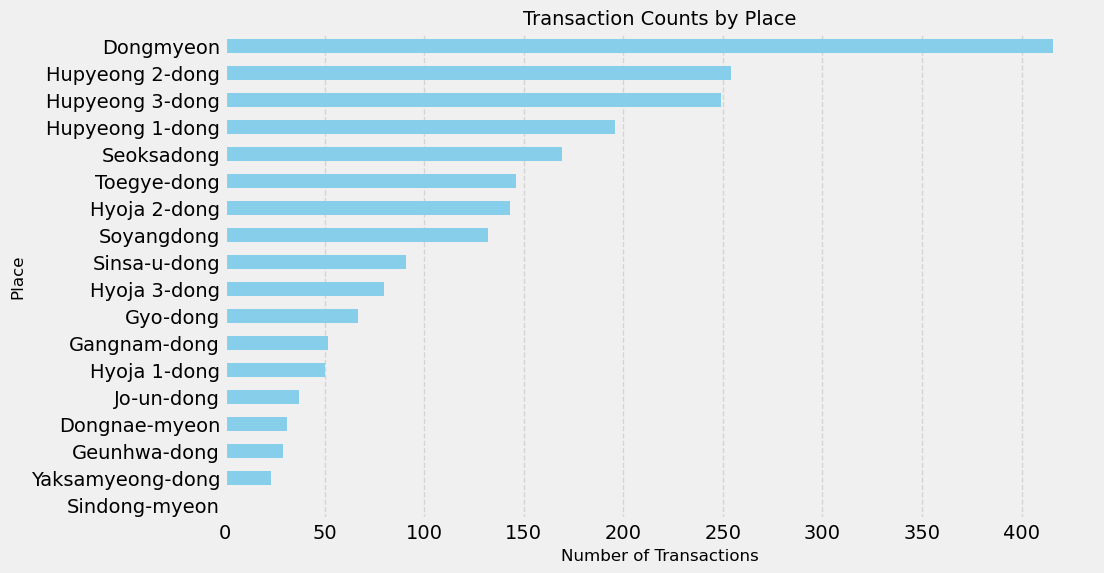

In [8]:
plt.style.use('fivethirtyeight')

# Count the number of transactions for each place and sort in descending order
place_counts = bakery_data['place'].value_counts().sort_values(ascending=True)

# Create bar chart
plt.figure(figsize=(10, 6))
place_counts.plot(kind='barh', color='skyblue') 

# Add labels and title
plt.title('Transaction Counts by Place', fontsize=14)
plt.ylabel('Place', fontsize=12)
plt.xlabel('Number of Transactions', fontsize=12)

# Add faint grid lines to x-axis
plt.grid(axis='x', linestyle='--', alpha=0.75)
# Erase horizontal gridlines
plt.grid(axis='y', linestyle='--', alpha=0)

# Show the plot
plt.show()

This is an interesting look at which areas the bakery sees the most customer demand coming from—at least in terms of delivery operations.

#### Product Sales

Since this is a market basket analysis, I'm primarily concerned with the performance of each individual item sold by the bakery. I'll use another bar graph here, this time plotting both the total quantity of each item sold and the total number of transactions in which each item appears. We'll reuse this plot format shortly, so I’ll also define it as a custom function for convenience.

Since we already know from the earlier `describe()` call that there are no sales for 'croque monsieur' or 'mad garlic', those two columns can be dropped from the dataset.

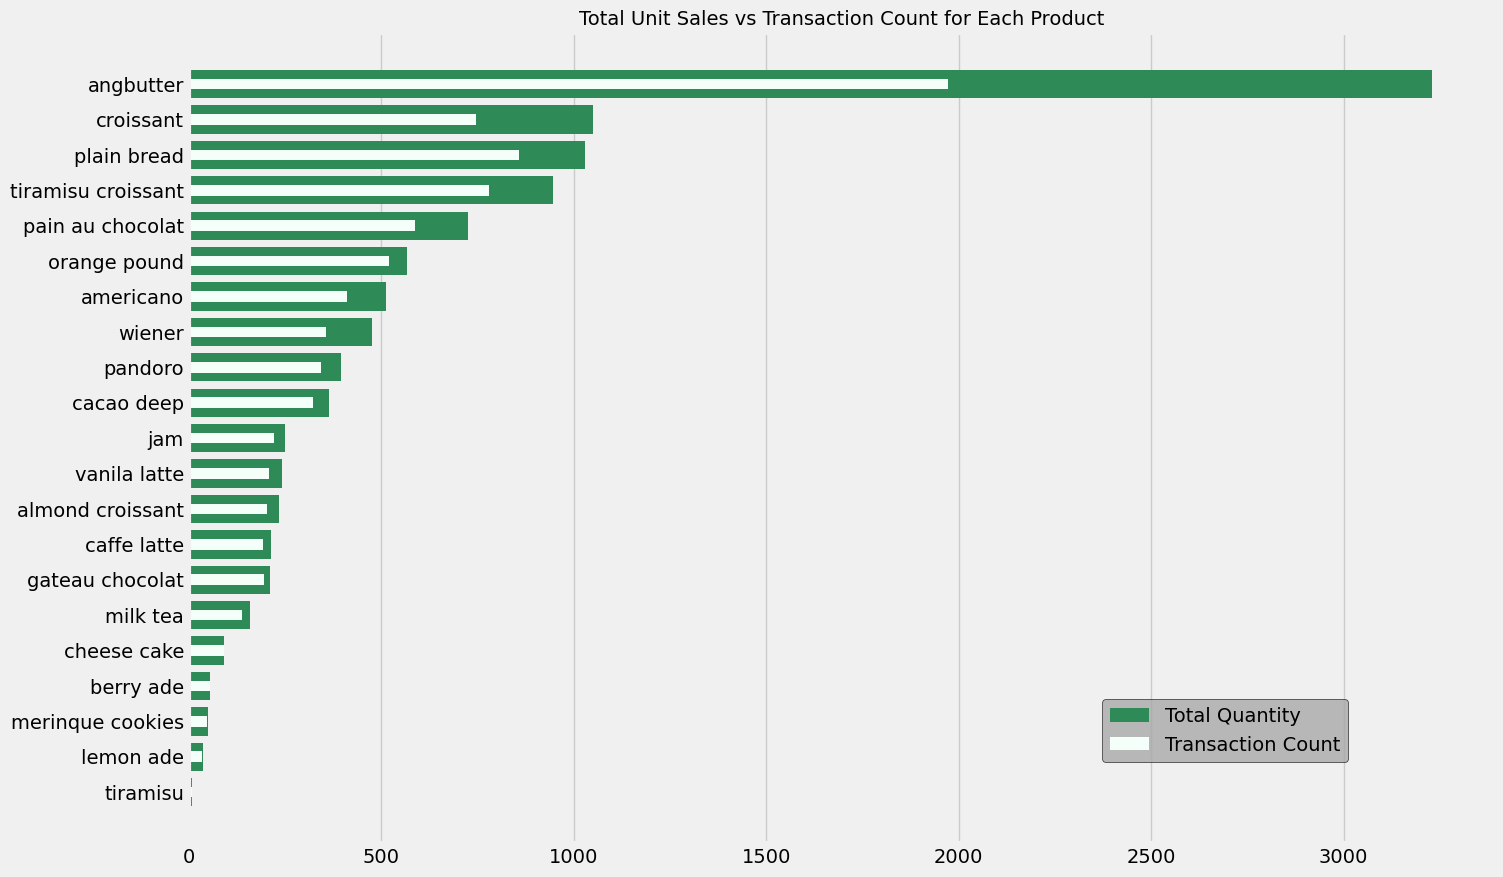

In [9]:
# Drop empty product columns 'croque monsieur' and 'mad garlic'
bakery_data = bakery_data.drop(columns=['croque monsieur', 'mad garlic'])

# List of product columns (replace these with actual product column names from your data)
product_columns = ['angbutter', 'plain bread', 'jam', 'americano', 'croissant', 
                   'caffe latte', 'tiramisu croissant', 'cacao deep', 'pain au chocolat', 
                   'almond croissant', 'milk tea', 'gateau chocolat', 'pandoro',
                   'cheese cake', 'lemon ade', 'orange pound', 'wiener',
                   'vanila latte', 'berry ade', 'tiramisu',  'merinque cookies']

def sales_plot(df, p_cols):
    # Calculate the total quantities of each product across all transactions
    total_quantities = df[p_cols].sum()

    # Count the number of transactions each product appears in
    transaction_counts = (df[p_cols] > 0).sum()

    # Combine both metrics into temp DataFrame
    metrics_df = pd.DataFrame({
        'Product': p_cols,
        'Total Quantity': total_quantities,
        'Transaction Count': transaction_counts
    })

    # Sort by Total Quantity
    metrics_df = metrics_df.sort_values(by='Total Quantity', ascending=True)

    # Set up a position range for the bars
    x = range(len(metrics_df))

    # Initialize figure and axis
    fig, ax = plt.subplots(figsize=(15, 10))

    # Total Quantity bars
    ax.barh(x, metrics_df['Total Quantity'], 0.8, color='seagreen', label='Total Quantity')

    # Transaction Count bars
    ax.barh(x, metrics_df['Transaction Count'], 0.3, color='mintcream', label='Transaction Count')

    # Labels and title
    ax.set_yticks(x)
    ax.set_yticklabels(metrics_df['Product'])
    ax.set_title('Total Unit Sales vs Transaction Count for Each Product', fontsize=14)

    # Legend and grid
    ax.legend(facecolor='darkgray', edgecolor='black', loc=(0.7, 0.1))
    plt.grid(axis='y', linestyle='--', alpha=0)

    # Show the plot
    plt.show()

sales_plot(bakery_data, product_columns)

The angbutter pastry is by far the highest-selling single item and is often sold in multiples per transaction. It must be pretty good!

Let's now view the share of total sales each product has across the different delivery locations.

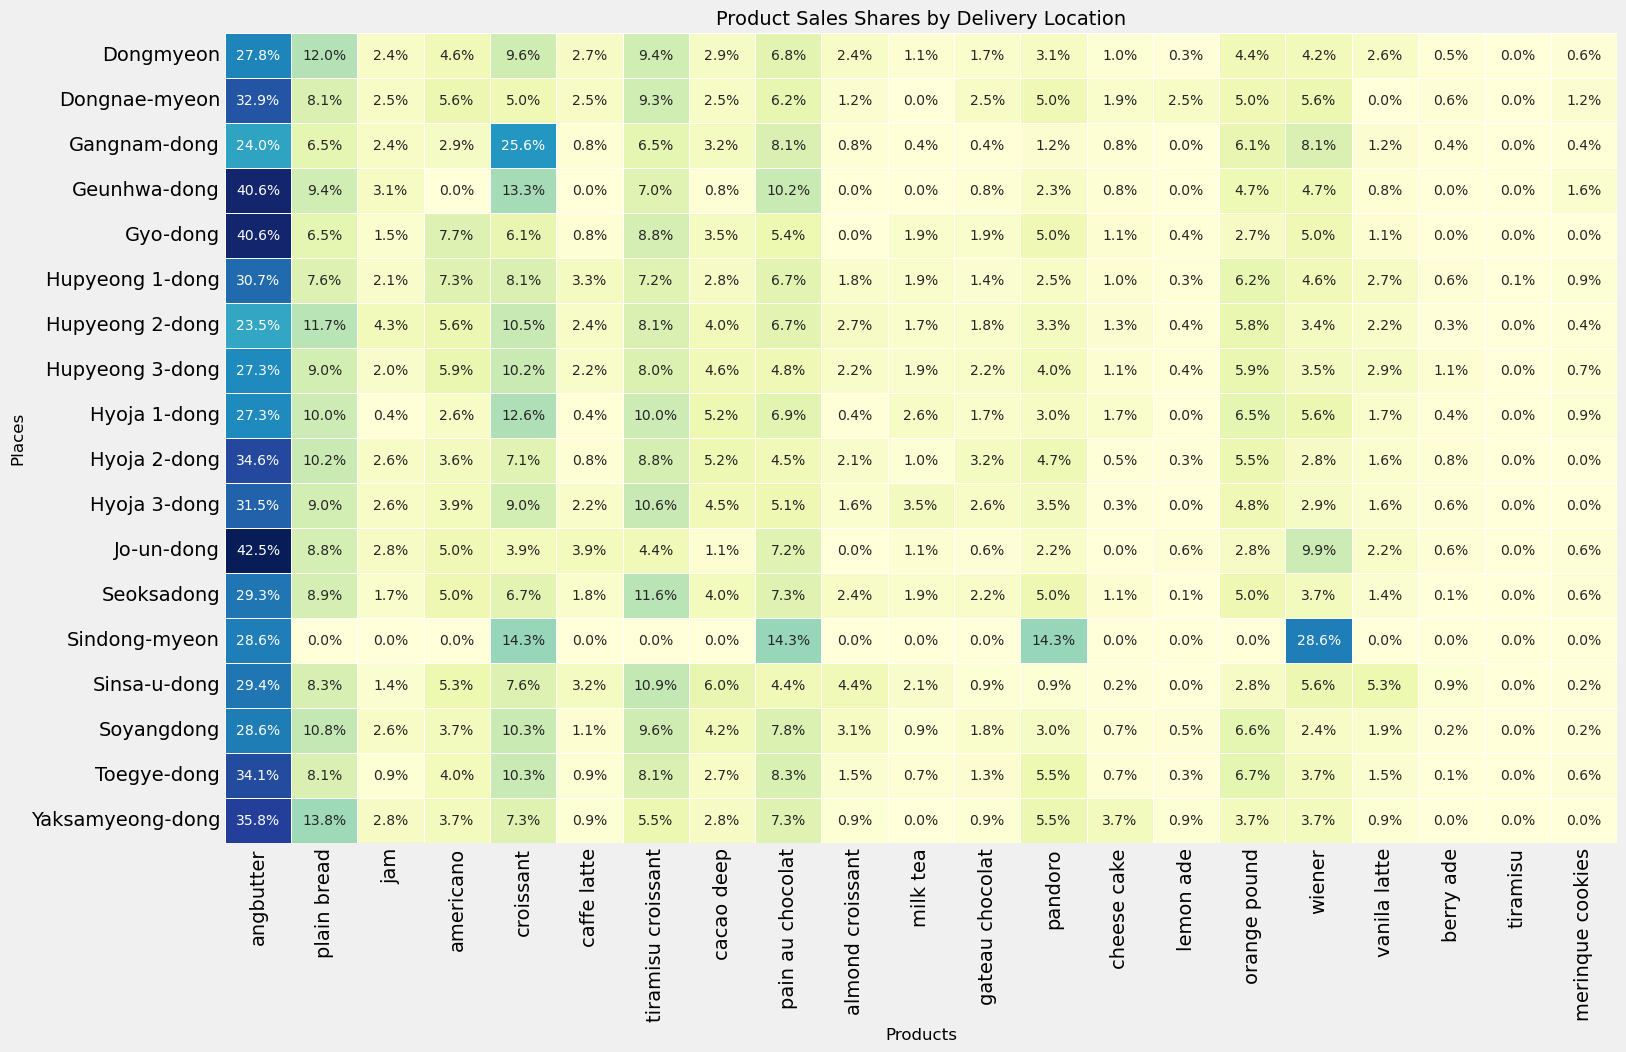

In [10]:
# Total product sales per place
product_place_data = bakery_data.groupby('place')[product_columns].sum()

# Convert to percent-of-whole calculation, per each place location
product_place_data_percentage = product_place_data.div(product_place_data.sum(axis=1), axis=0) * 100

# Initialize figure
plt.figure(figsize=(16, 10))  # Increase the figure dimensions

# Data labels
annot = product_place_data_percentage.round(2).applymap(lambda x: f"{x:.1f}%")

# Plot heatmap
sns.heatmap(product_place_data_percentage, annot=annot, cmap="YlGnBu", linewidths=0.5, annot_kws={'size': 10}, fmt='', cbar=False)

# Axis labels and title
plt.xlabel('Products', fontsize=12)
plt.ylabel('Places', fontsize=12)
plt.title('Product Sales Shares by Delivery Location', fontsize=14)

# Show plot
plt.show()

We can see that angbutter pastries continue to dominate sales across every delivery location, often followed by plain bread and various croissant products. The share of sales between products appears to remain relatively consistent across different regions.

Fair warning: don’t be misled by the exceptional pandoro and wiener sales in the "Sindong-myeon" location! Remember, there is only a single transaction recorded for this entry.

Now, let's generate another heatmap — this time comparing the different products against each other. We'll be plotting the number of transactions each product appears in, which is a more suitable metric for our market basket analysis. As before, I’ll define this plot structure as a custom function for future reuse.

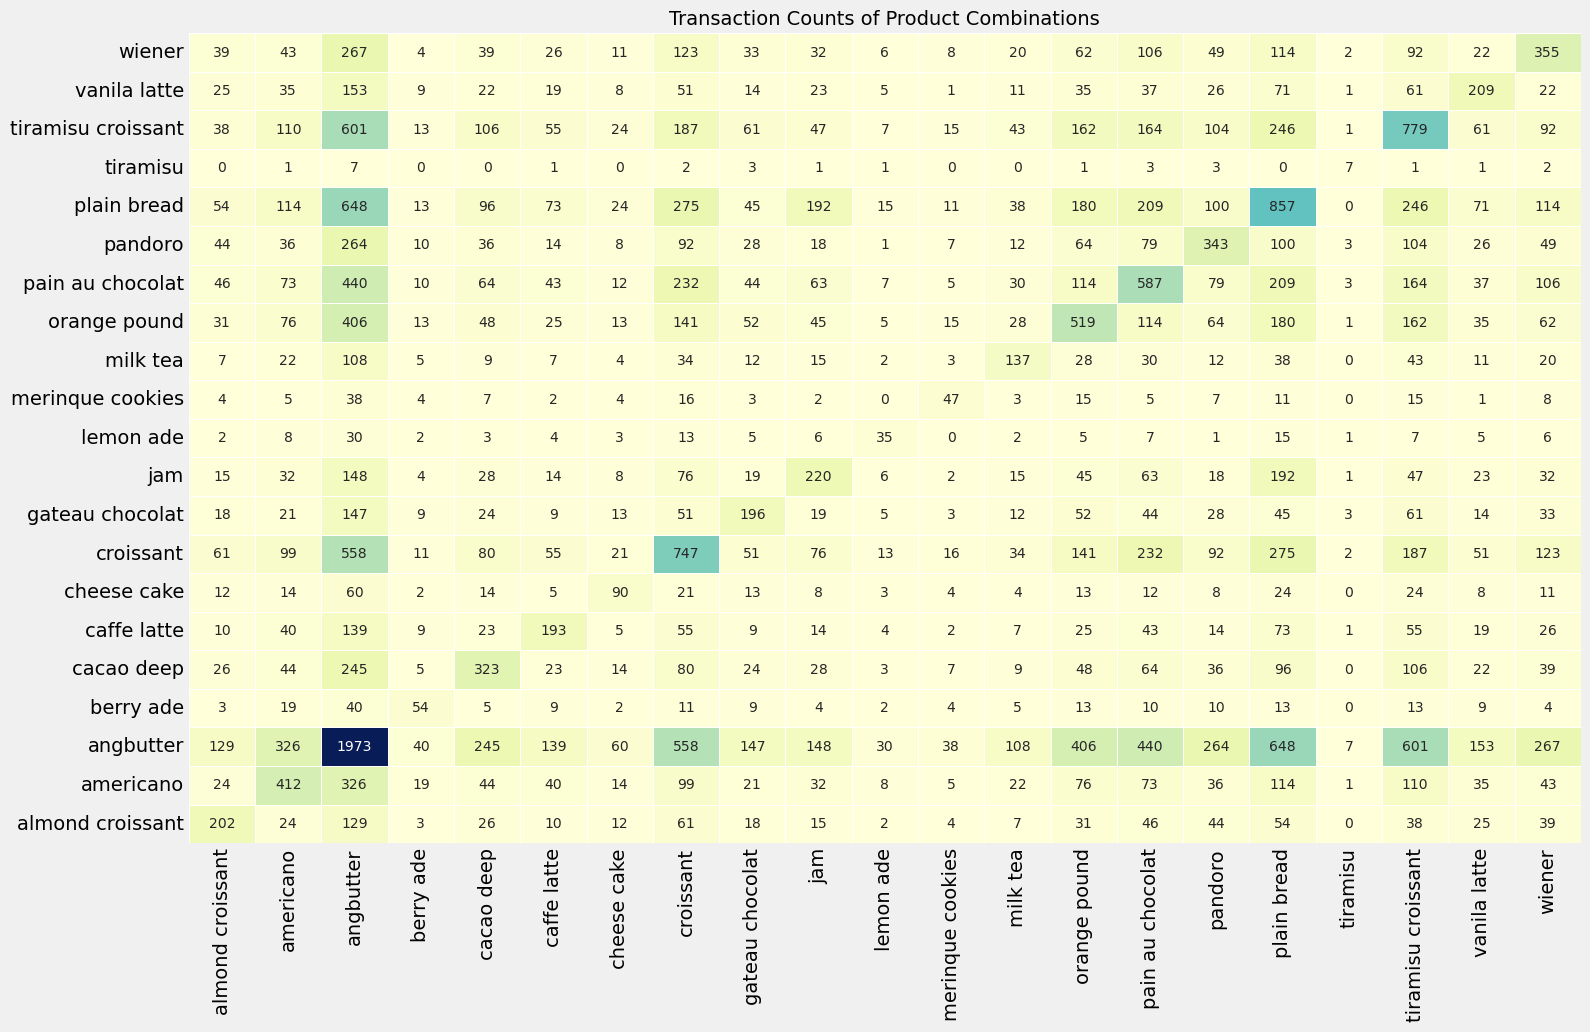

In [11]:
def plot_heatmap(df, p_cols):
    
    # Create a binary matrix indicating if a product was purchased
    product_binary_data = df[p_cols].gt(0).astype(int)

    # Create co-occurrence matrix
    co_occurrence_matrix = product_binary_data.T.dot(product_binary_data)

    # Sort rows and columns alphabetically
    sorted_matrix = co_occurrence_matrix.sort_index(axis=0, ascending=False).sort_index(axis=1)

    # Plot the heatmap
    plt.figure(figsize=(16, 10))
    sns.heatmap(sorted_matrix, annot=True, annot_kws={'size': 10}, fmt="d", cmap="YlGnBu", linewidths=0.5, cbar=False)

    # Set labels and title
    plt.title('Transaction Counts of Product Combinations', fontsize=14)
    
    # Display
    plt.show()

plot_heatmap(bakery_data, product_columns)

Of course, angbutter is a top-seller! However, in this case, it largely obscures potential insights we might gain from other product interactions. 

Let’s recreate the same plot—this time excluding "angbutter" from the product columns to allow clearer comparisons among the remaining items.

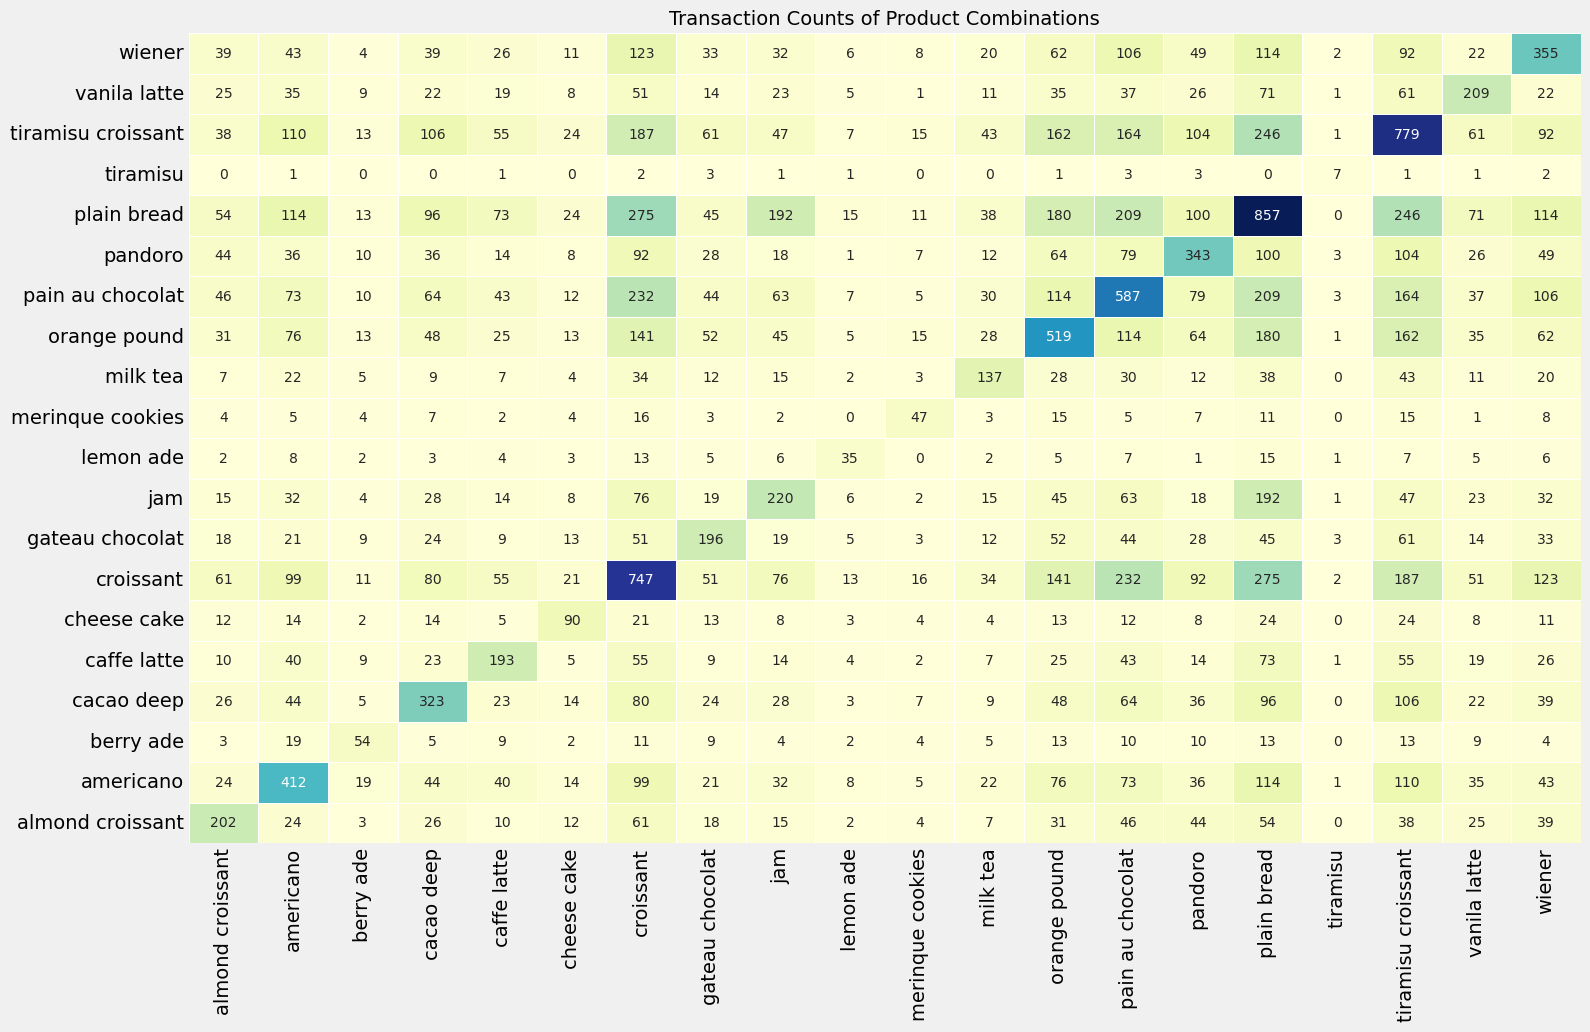

In [12]:
# List of product columns (without 'angbutter')
sans_angbutter = ['plain bread', 'jam', 'americano', 'croissant', 
                   'caffe latte', 'tiramisu croissant', 'cacao deep', 'pain au chocolat', 
                   'almond croissant', 'milk tea', 'gateau chocolat', 'pandoro', 
                   'cheese cake', 'lemon ade', 'orange pound', 'wiener', 'vanila latte',
                   'berry ade', 'tiramisu', 'merinque cookies']

plot_heatmap(bakery_data, sans_angbutter)

We can observe some common interactions between typically high-sales items, such as the plain croissant, tiramisu croissant, plain bread, pain au chocolat, and orange pound cake.

#### Sales by Weekday

Let’s examine how sales are distributed across a typical week. While this isn’t essential for performing a market basket analysis, it provides valuable context for explaining potential associations and making recommendations to clients.

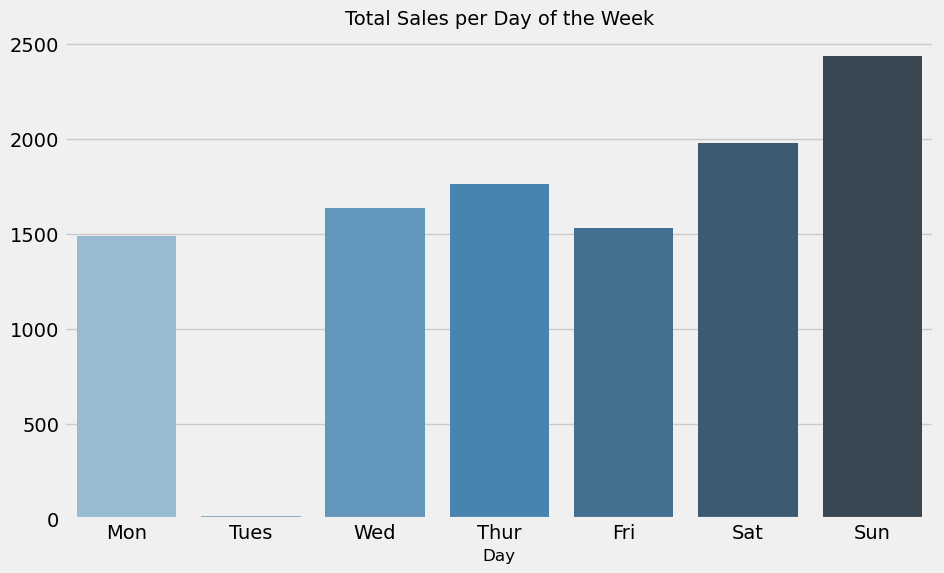

In [13]:
# Sum the total sales by day of the week
bakery_data['total_sales'] = bakery_data[product_columns].sum(axis=1)
sales_by_weekday = bakery_data.groupby('day of week')['total_sales'].sum()

# Reorder the days of the week for correct order in the plot
ordered_weekdays = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
sales_by_weekday = sales_by_weekday[ordered_weekdays]

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_weekday.index, y=sales_by_weekday.values, palette="Blues_d")

# Add labels and title
plt.title('Total Sales per Day of the Week', fontsize=14)
plt.xlabel('Day', fontsize=12)

# Show plot
plt.show()


Across the dataset, there are typically between 1,500 and 2,500 sales on any given day of the week, except for Tuesday. The weekends tend to see more sales than the rest of the week, with Sundays leading by a significant margin. Perhaps people have more time to visit the local bakery outside of the workweek. 

It’s noticeable that there are minimal transactions on Tuesdays, but *not* zero. It’s likely that the bakery is not generally open on Tuesdays. Here’s a closer look at the few transactions that *do* occur on a Tuesday:

In [14]:
# Filter rows where the 'datetime' is on a Tuesday
tuesday_sales = bakery_data[bakery_data['day of week'] == 'Tues']

# Drop columns where all values are NaN
tuesday_sales = tuesday_sales.dropna(axis=1, how='all')

# Display the rows for Tuesday with cleaned columns
print(tuesday_sales)

                datetime day of week    total            place  angbutter  \
1277 2019-12-24 11:13:00        Tues  15300.0        Dongmyeon        1.0   
1278 2019-12-24 11:17:00        Tues  21400.0       Jo-un-dong        3.0   
1279 2019-12-24 13:14:00        Tues  19300.0  Hupyeong 1-dong        NaN   

      americano  tiramisu croissant  gateau chocolat  cheese cake  wiener  \
1277        1.0                 1.0              NaN          NaN     NaN   
1278        NaN                 NaN              NaN          NaN     2.0   
1279        NaN                 1.0              1.0          1.0     NaN   

      merinque cookies  total_sales  
1277               NaN          3.0  
1278               NaN          5.0  
1279               1.0          4.0  


These Tuesday sales all occurred on Christmas Eve! Perhaps the transactions were part of an employee Christmas party? Aside from this instance, it's safe to assume that the bakery is generally closed on Tuesdays.

#### Sales Over Time

After examining how sales are distributed across the days of the week, it’s also helpful to look at the distribution of sales over time. We already know the earliest and latest dates in the dataset: July 2019 and June 2020. Let’s now see how sales change within that time span.

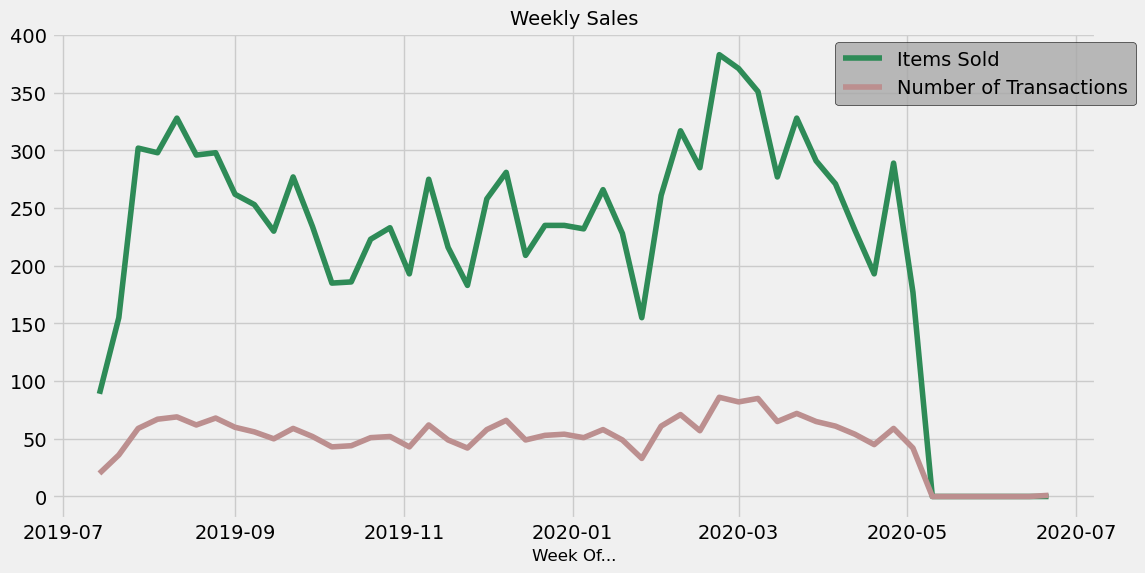

In [15]:
# Create a copy of the original df, "bakery_ts"
bakery_ts = bakery_data.copy()

# Set 'datetime' as the index
bakery_ts.set_index('datetime', inplace=True)

# Sum the total sales for all products
bakery_ts['total_sales'] = bakery_ts[product_columns].sum(axis=1)

# Resample/change the total product sales to weekly level-of-detail
weekly_sales = bakery_ts['total_sales'].resample('W').sum()

# Count the number of transactions (rows) per week
weekly_transactions = bakery_ts.resample('W').size()

# Initialize plot figure
plt.figure(figsize=(12, 6))

# Plot total item sales line
plt.plot(weekly_sales.index, weekly_sales.values, label='Items Sold', color='seagreen')

# Plot transaction count line
plt.plot(weekly_transactions.index, weekly_transactions.values, label='Number of Transactions', color='rosybrown')

# Add labels and title
plt.title('Weekly Sales', fontsize=14)
plt.xlabel('Week Of...', fontsize=12)

# Position and format legend
plt.legend(facecolor='darkgray', edgecolor='black', loc=(0.75, 0.85))

# Display the plot
plt.show()

There appears to be a tail at the end of this line graph, likely caused by a data entry error. Here’s a closer look:

In [16]:
# Review all entries after the start of May 2020
print(bakery_ts[bakery_ts.index > "2020-05-01"][['day of week', 'total_sales']])

# This observation contains no item sales, and is out of the date range
print(bakery_data[bakery_data['datetime']=='2020-06-18 14:52:00'])

                    day of week  total_sales
datetime                                    
2020-05-01 11:09:00         Fri          7.0
2020-05-01 11:10:00         Fri          4.0
2020-05-01 11:32:00         Fri          3.0
2020-05-01 11:47:00         Fri          4.0
2020-05-01 12:00:00         Fri          7.0
2020-05-01 12:10:00         Fri          4.0
2020-05-01 13:05:00         Fri          6.0
2020-05-01 13:55:00         Fri          5.0
2020-05-01 15:03:00         Fri          3.0
2020-05-01 15:19:00         Fri          3.0
2020-05-02 11:37:00         Sat          4.0
2020-05-02 11:39:00         Sat          4.0
2020-05-02 12:15:00         Sat          3.0
2020-05-02 13:45:00         Sat          3.0
2020-05-02 14:45:00         Sat          5.0
2020-06-18 14:52:00         NaN          0.0
                datetime day of week  total place  angbutter  plain bread  \
2653 2020-06-18 14:52:00         NaN    NaN   NaN        NaN          NaN   

      jam  americano  croissant  ca

This observation occurs in June 2020, well after the other data points were recorded. It also does not record any sales, despite representing a transaction occurrence. The main body of transaction data seems to conclude at the start of May. It would be best to remove this empty row of June data.

In [17]:
# Drop the lone row occurring in June
bakery_data = bakery_data[bakery_data['datetime'].dt.month != 6]

## Full Basket Analysis

Since this dataset is relatively small and features a limited selection of products, we can begin by examining market basket metrics across all individual items. First, the product columns need to be converted from the current sales quantity format to an updated one-hot encoded format.

In [18]:
# List of product column headers
item_columns = ['angbutter', 'plain bread', 'jam', 'americano', 'croissant', 'caffe latte', 
                'tiramisu croissant', 'cacao deep', 'pain au chocolat', 'almond croissant', 
                'milk tea', 'gateau chocolat', 'pandoro', 'cheese cake', 'lemon ade',
                'orange pound', 'wiener', 'vanila latte', 'berry ade', 'tiramisu', 'merinque cookies']

# Convert quantities to one-hot encoded values
basket = bakery_data[item_columns].applymap(lambda x: True if x > 0 else False)

#### Apriori

With the product columns encoded as binary values, the Apriori algorithm can be applied to the bakery data to filter out rules that are not frequent. The algorithm works by pruning the family branches of subset itemsets that have low support, under the reasoning that these subsets will also have equal or lower support. The following diagram better illustrates how branches are pruned:

![Node Diagram of the Apriori Algorithm with Low-Support Branches Pruned](https://github.com/bryantjay/Portfolio/blob/main/Korean%20Bakery%20Market%20Basket%20Analysis/source_files/apriori_diagram.png?raw=true)

(*Note: This specific image is sourced from [here](https://www.kaggle.com/code/akhilram7/affinity-analysis-of-market-basket), though numerous variants of the same general diagram exist elsewhere. I’m unsure of the exact origins for the Apriori pruning diagram.*)

We can utilize `mlxtend`'s `apriori` function to create a list of frequent itemsets. The `min_support` parameter defines the support threshold by which to prune itemsets. Since this dataset contains one product (the "angbutter" pastry) that dominates sales, I’m going to keep the support threshold relatively low at 5%, so that some of the more subtle and interesting rules can be observed.

In [19]:
# Apply the Apriori algorithm to find frequent itemsets with a minimum support of 0.05 (5%)
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)

print(frequent_itemsets.head())

    support       itemsets
0  0.743686    (angbutter)
1  0.323031  (plain bread)
2  0.082925          (jam)
3  0.155296    (americano)
4  0.281568    (croissant)


#### Association Rules

With our data pruned of infrequent itemsets, we can generate our association rules. This is done through `mlxtend`'s `association_rules` function. This function also includes a threshold parameter, which allows us to filter association rules based on any result metric of the function. In this case, since I’m still exploring how the itemsets interact, I’ll keep the threshold set to 5% support for now, just like in the `apriori` function. 

I won’t be discussing the representativity, Jaccard, certainty, or Kulczynski metrics in this project; these will be dropped.

In [20]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.05, num_itemsets=4000)

# Extra metrics to be dropped
rules = rules.drop(columns=['representativity', 'jaccard', 'certainty', 'kulczynski'])

# Show the first 5 association rules
print(rules.head())

     antecedents    consequents  antecedent support  consequent support  \
0    (angbutter)  (plain bread)            0.743686            0.323031   
1  (plain bread)    (angbutter)            0.323031            0.743686   
2          (jam)    (angbutter)            0.082925            0.743686   
3    (angbutter)          (jam)            0.743686            0.082925   
4    (americano)    (angbutter)            0.155296            0.743686   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.244252    0.328434  1.016727  0.004018    1.008046       0.064186  
1  0.244252    0.756126  1.016727  0.004018    1.051008       0.024302  
2  0.055786    0.672727  0.904585 -0.005884    0.783180      -0.103153  
3  0.055786    0.075013  0.904585 -0.005884    0.991446      -0.291547  
4  0.122880    0.791262  1.063973  0.007388    1.227921       0.071180  


We have a successful output. Let’s now iterate over the columns and view each metric, sorted from high to low.

In [21]:
# Metrics to iterate over
cols = ['support', 'confidence', 'lift', 'leverage', 'conviction', 'zhangs_metric']

# Iterate over each metric by which to sort assoc. rules high-to-low
for col in cols:
    print(col, "\n---\n", \
        rules[['antecedents', 'consequents', col]].sort_values(col, ascending=False), '\n')

support 
---
              antecedents                    consequents   support
0            (angbutter)                  (plain bread)  0.244252
1          (plain bread)                    (angbutter)  0.244252
10           (angbutter)           (tiramisu croissant)  0.226536
11  (tiramisu croissant)                    (angbutter)  0.226536
6            (angbutter)                    (croissant)  0.210328
..                   ...                            ...       ...
63         (plain bread)  (pain au chocolat, angbutter)  0.053524
41           (croissant)                 (orange pound)  0.053147
40        (orange pound)                    (croissant)  0.053147
8          (caffe latte)                    (angbutter)  0.052394
9            (angbutter)                  (caffe latte)  0.052394

[70 rows x 3 columns] 

confidence 
---
              antecedents                      consequents  confidence
26                 (jam)                    (plain bread)    0.872727
4           

##### Some Quick Observations:

- The products "plain bread" and "jam" appear to have a notable relationship, standing out from other items in terms of confidence, lift, leverage, conviction, and Zhang's metric.
- Higher confidence values often have "angbutter" as the consequent itemset, while lower confidence values tend to feature "angbutter" as the antecedent.
- There is a significant amount of multi-item purchasing between popular products like angbutter, croissants, and pains au chocolat.

#### Association Plots

Let's plot each metric to get a feel for how they are distributed across all the rules.

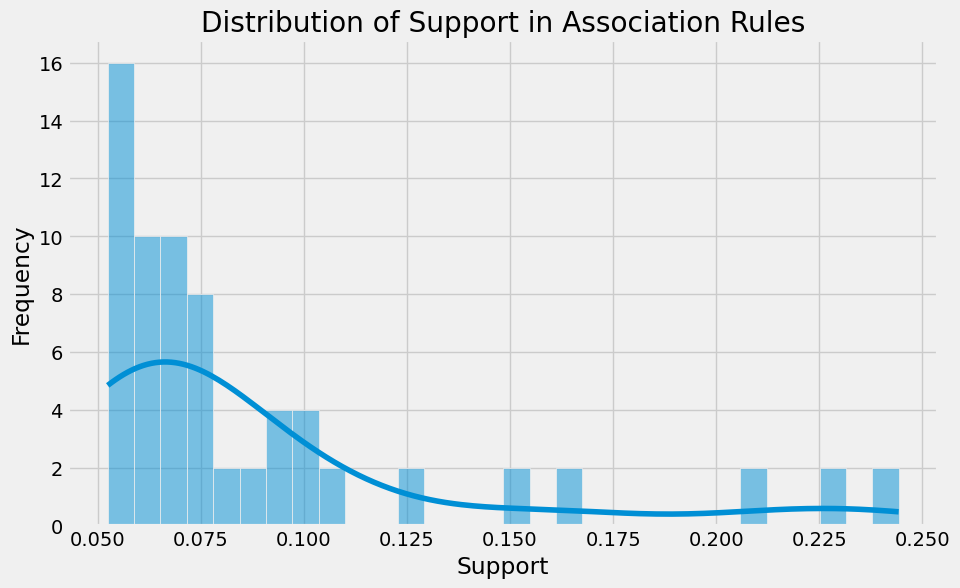

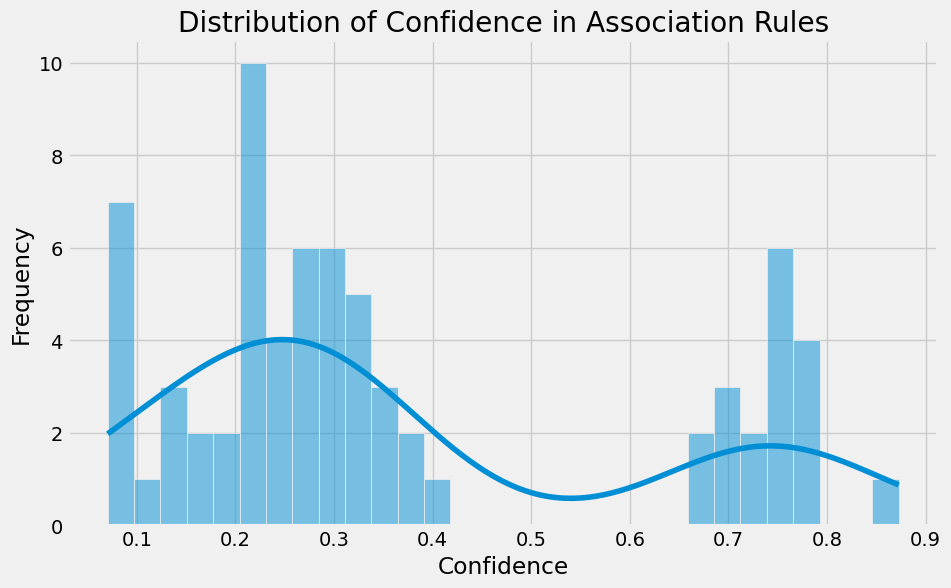

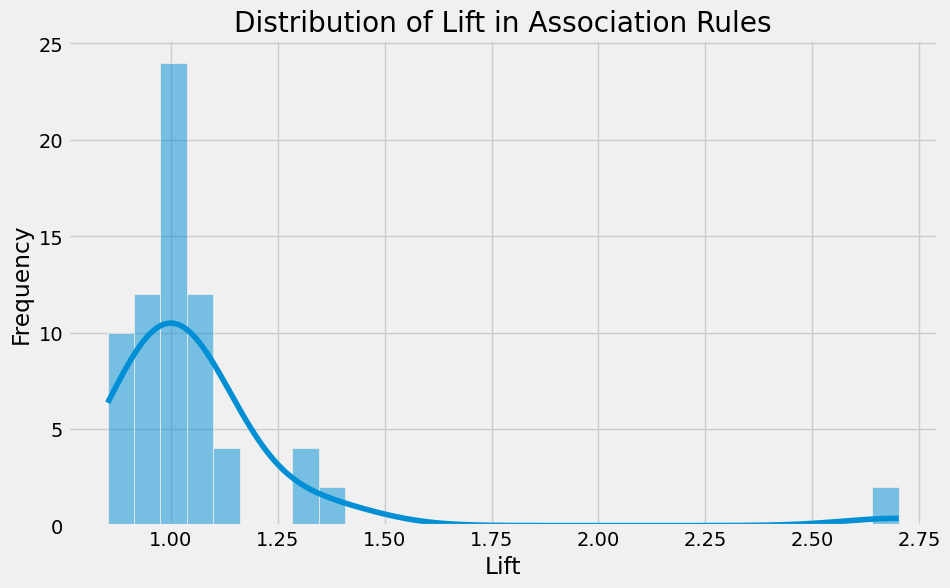

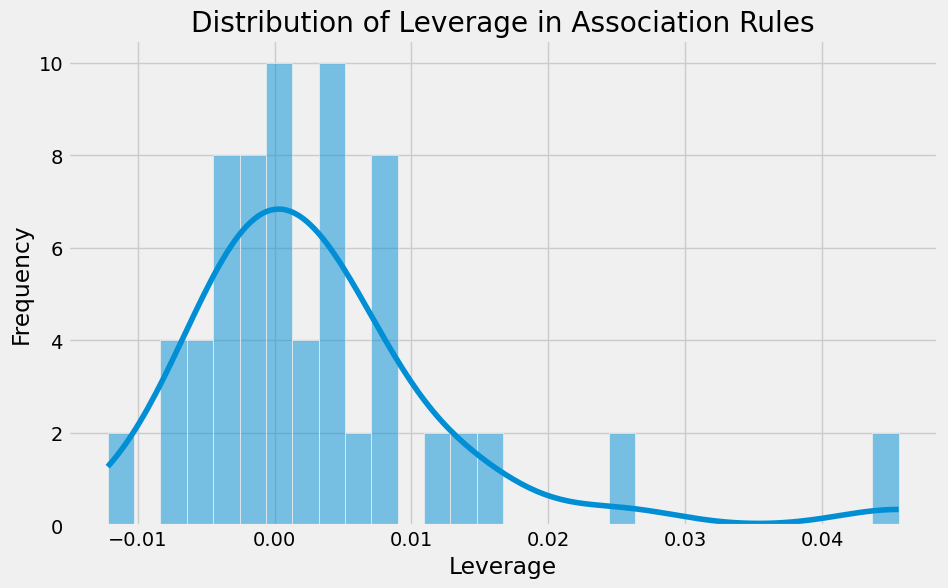

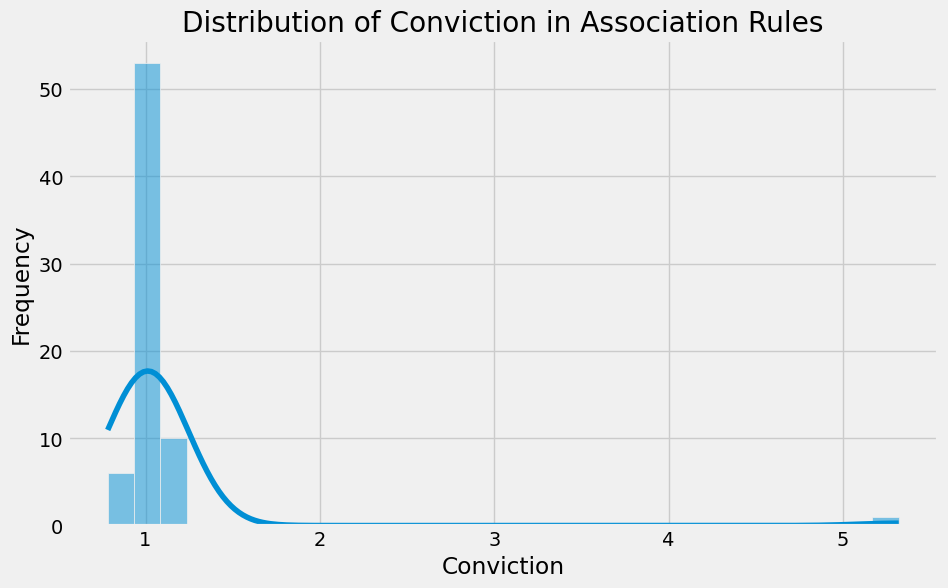

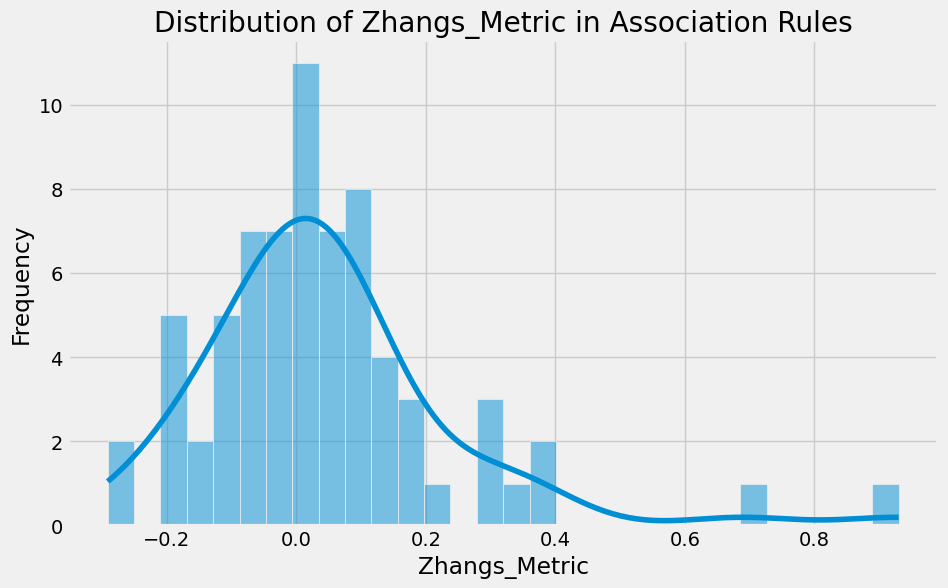

In [22]:
for col in cols:

    # Initialize figure
    plt.figure(figsize=(10, 6))

    # Plot histogram with density line
    sns.histplot(rules[col], bins=30, kde=True)

    # Titles and labels
    plt.title(f'Distribution of {col.title()} in Association Rules')
    plt.xlabel(col.title())
    plt.ylabel('Frequency')

    # Show and close plot
    plt.show()
    plt.close()

The "lift" and "conviction" distributions are a bit difficult to view due to the presence of an outlier on each graph. Here's a more easily discernible version for each:

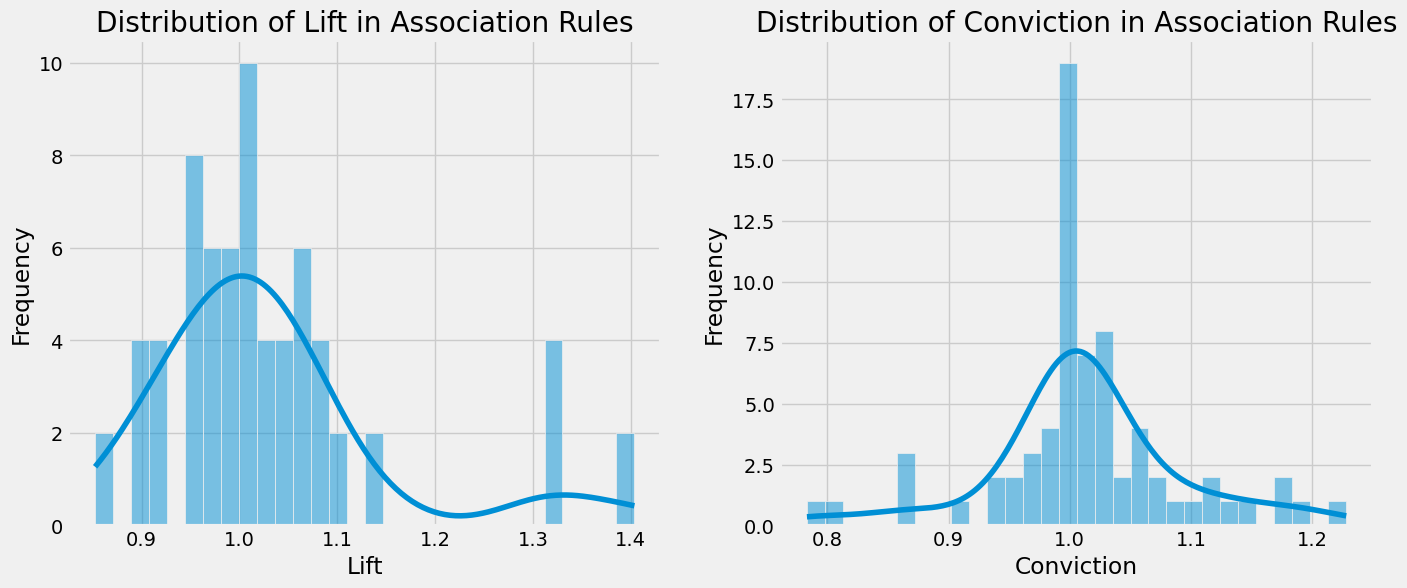

In [23]:
# Filter rules for lift and conviction
sans_toast_lift = rules[rules['lift'] < 2.5]
sans_toast_conviction = rules[rules['conviction'] < 5]

# Function to plot the distribution (similar to histograms from before)
def plot_distribution(data, ax, column, title):
    sns.histplot(data[column], bins=30, kde=True, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(column.title())
    ax.set_ylabel('Frequency')

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot Lift distribution
plot_distribution(sans_toast_lift, axes[0], 'lift', 'Distribution of Lift in Association Rules')

# Plot Conviction distribution
plot_distribution(sans_toast_conviction, axes[1], 'conviction', 'Distribution of Conviction in Association Rules')

# Show the plots
plt.show()


We can see that the support metric is not uniform, meaning there are a small number of high-support rules that are outweighing the larger number of low-support ("less frequent") rules. These high-support rules are all between popular items like "angbutter", "plain bread", and "croissant". The confidence metric is bimodal. Confidence heavily favors rules with high-support consequents and disfavors rules with high-support antecedents; this bimodal pattern could be portraying that dynamic. All other metrics seem to be normally distributed, although they are also skewed towards some high outliers (especially lift and conviction). These outliers all seem to specifically reference the association between "plain bread" and "jam".

## Aggregated Items

In my experience, when I visit a bakery, café, or coffee shop, I tend to vary my drink orders depending on what I'm feeling at any given moment. Coffee or tea? Iced or hot? Espresso shot or decaf? The decisions can vary pretty wildly, but ultimately I'll usually decide on some type of drink and (sometimes) a food item. Some customers might not order food, and others might order a whole range of food and drink items. This is a good scenario for some aggregation.

**Aggregation** in Market Basket Analysis is the process of grouping items together based on some criteria. If you're selling t-shirts, perhaps you could group shirts by color or by size. Ultimately, it may not be a specific brand that matters to a given shopper, but any substitutable product that can sufficiently fill a need. We've skipped any initial aggregations thus far, as the data is small enough, and it's always good to first view the basket at the smallest level of detail. However, sometimes aggregation may need to be employed before any significant basket metrics can be pulled from the data, especially if the dataset is too large.

In the case of this basket data, I've noticed a few broad characteristics by which we can categorize different products. First, there's a small selection of croissants, including regular, almond, pain au chocolat, cacao deep, and tiramisu. There's also an assortment of cakes and cake-like pastries: 'gateau chocolat', 'pandoro', 'cheese cake', 'orange pound' cake, and the 'tiramisu' pastry (distinct from the tiramisu croissant). I also noticed two categories of drinks: a selection of coffee drinks and a selection of less-caffeinated options. I opted to include "milk tea" with the fruitier "refresher" options, since I usually think of tea as being a bit lighter than coffee caffeine-wise, and it often comes flavored with fruit; others may disagree with this take.

In [24]:
bakery_agg = bakery_data.copy()

bakery_agg = bakery_agg.drop(columns='total_sales')


# Dictionary of columns to categorize and aggregate
categories = {
    'coffees': ['americano', 'vanila latte', 'caffe latte'],
    'cakes': ['gateau chocolat', 'pandoro', 'cheese cake', 'orange pound', 'tiramisu'],
    'croissants': ['croissant', 'tiramisu croissant', 'pain au chocolat', 'almond croissant', 'cacao deep'],
    'refreshments': ['lemon ade', 'berry ade', 'milk tea']
}

# Loop through each category to aggregate the fields and drop the original columns
for category, columns in categories.items():
    bakery_agg[category] = bakery_agg[columns].sum(axis=1)
    bakery_agg = bakery_agg.drop(columns=columns)


print(bakery_agg.head())

             datetime day of week    total place  angbutter  plain bread  jam  \
0 2019-07-11 15:35:00        Thur  23800.0   NaN        1.0          NaN  NaN   
1 2019-07-11 16:10:00        Thur  15800.0   NaN        1.0          NaN  NaN   
2 2019-07-12 11:49:00         Fri  58000.0   NaN        NaN          NaN  NaN   
3 2019-07-13 13:19:00         Sat  14800.0   NaN        1.0          1.0  NaN   
4 2019-07-13 13:22:00         Sat  15600.0   NaN        2.0          NaN  NaN   

   wiener  merinque cookies  coffees  cakes  croissants  refreshments  
0     NaN               NaN      2.0    0.0         3.0           0.0  
1     NaN               NaN      0.0    1.0         1.0           0.0  
2     NaN               NaN      0.0    0.0        14.0           0.0  
3     NaN               NaN      1.0    0.0         0.0           0.0  
4     NaN               NaN      0.0    0.0         1.0           0.0  


Here's the sales and transaction counts for the revised basket:

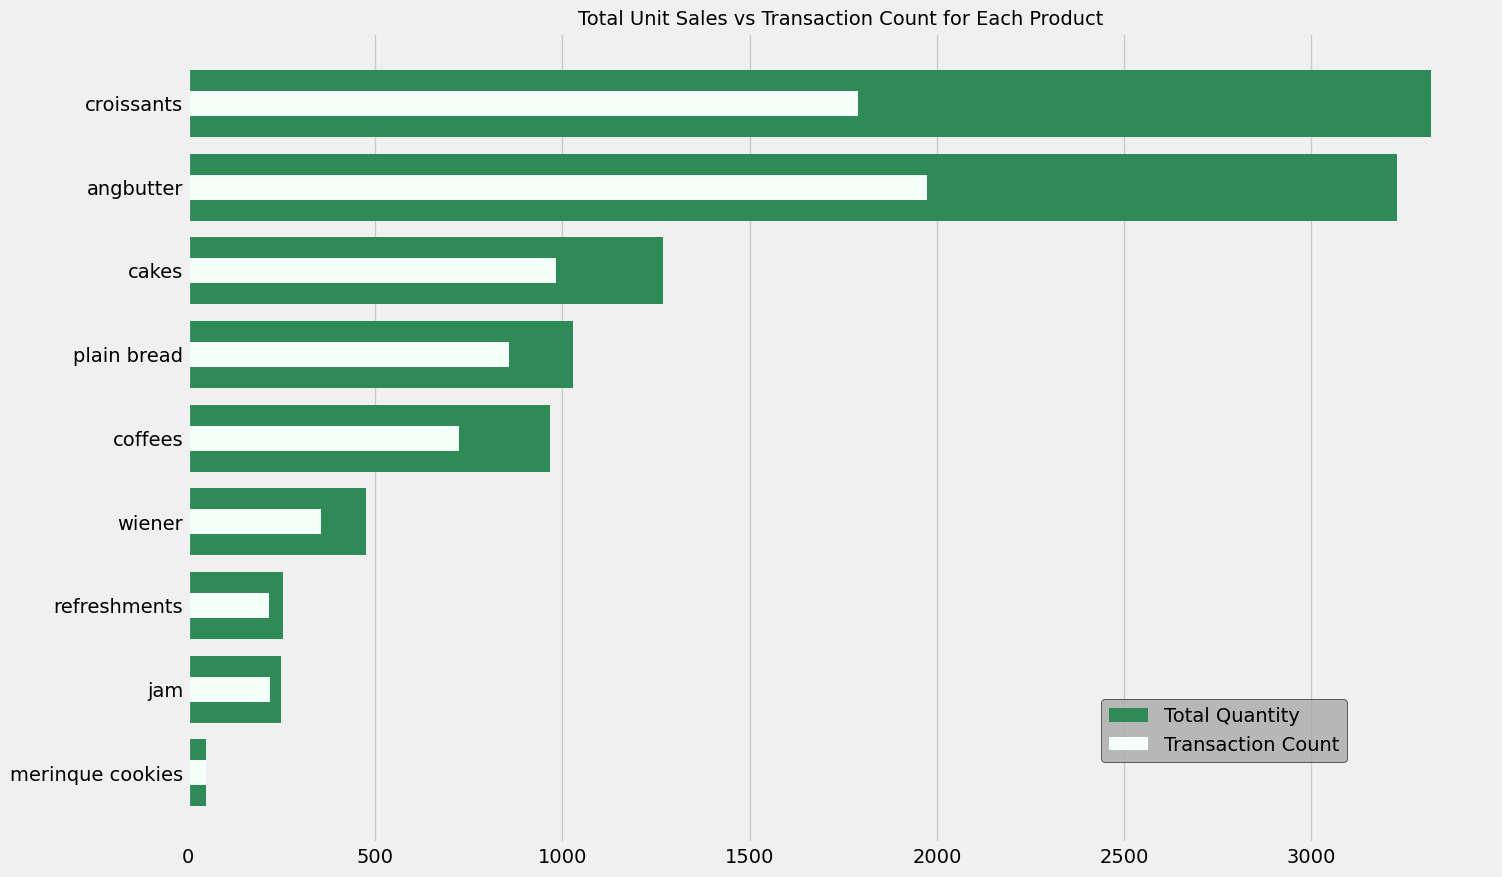

In [25]:
# List of revised product columns
product_columns = ['angbutter', 'plain bread', 'jam', 'wiener', 'merinque cookies', 'coffees', 'cakes', 'croissants', 'refreshments']

# Custom sales plotting func from earlier
sales_plot(bakery_agg, product_columns)

When grouped together, the croissants actually manage to overtake the angbutter pastry in overall sales (although not in the total number of transactions). We also see that grouping the various cake- and coffee-based food items totals their sales up to the level of the moderately successful "plain bread" product.

Let's view a revised association heatmap:

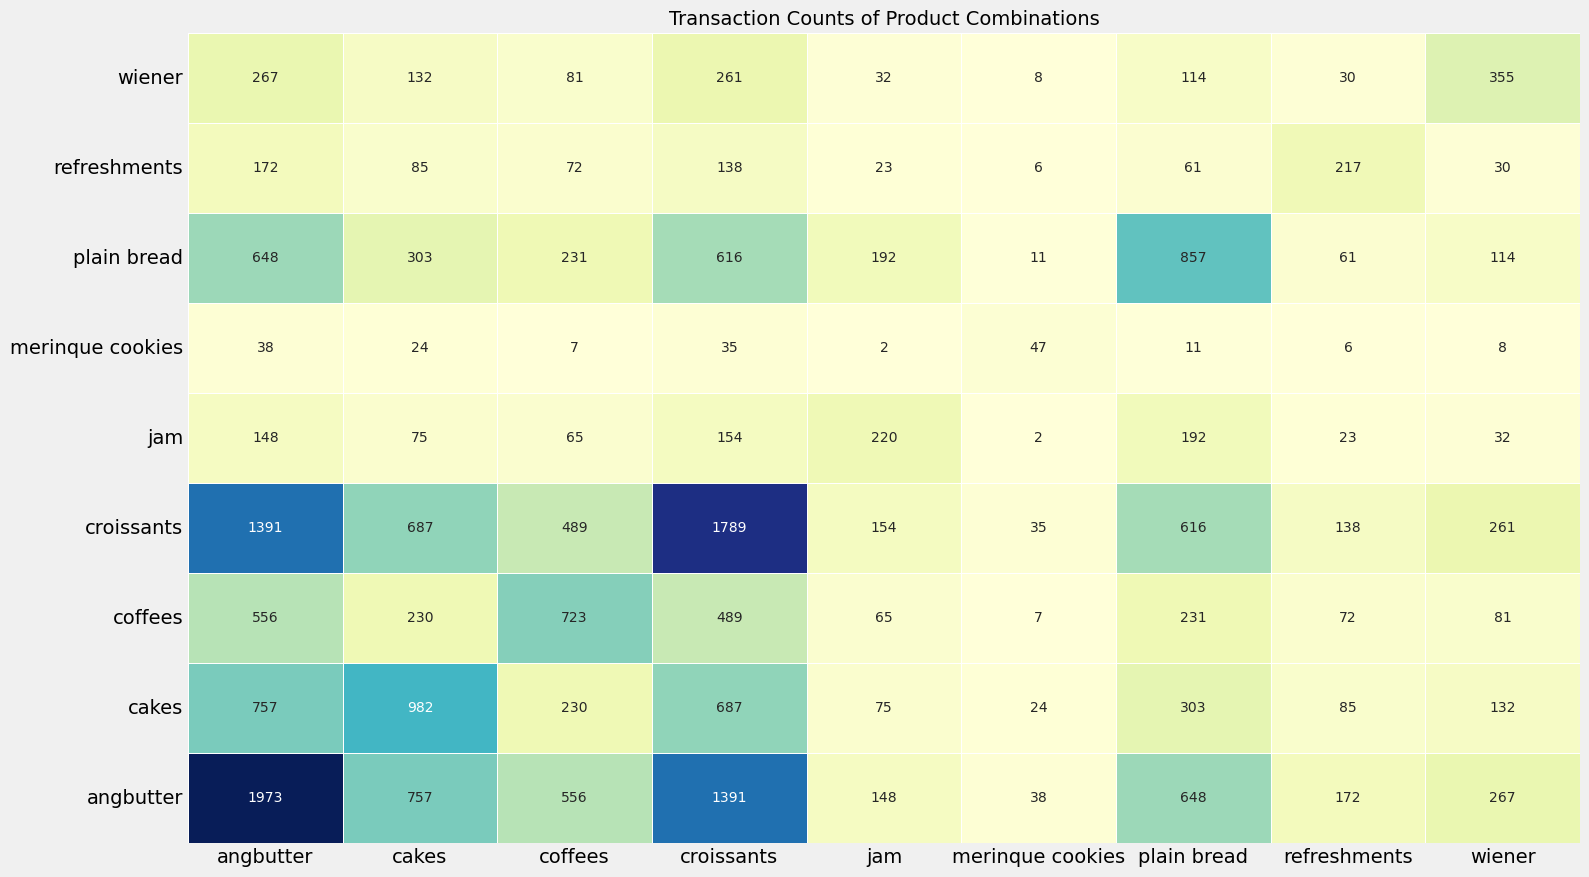

In [26]:
# Custom heatmap plotting func from earlier
plot_heatmap(bakery_agg, product_columns)

We can note that there's a lot of overlap between angbutter, cake, coffee, croissant, and plain bread items, as these make up the most common products. It appears that many customers enjoy coffee with their croissants and angbutter pastries, as combinations with one of these items make up around two-thirds of all coffee transactions. Similarly prevalent relationships seem to exist with the angbutter and croissant items with respect to plain bread and cake items. In fact, due to the commonality of angbutter and croissant items across transactions, it generally appears that either one of these items may be more than 50%-60% likely to be purchased along with the purchase of just about any other given item category. This is just a characteristic of top-selling items.

A more interesting pattern lies within our jam sales. Jam makes an appearance in 220 transactions — just over 8% of the data. Of those 220 transactions, we see plain bread make an appearance in a whopping 192 of them (87%); this is the *confidence* score for the rule "jam → plain bread", and it's significantly greater than the scores of either the angbutter or croissant categories, despite those items making up a much larger portion of transactions.

However, we don't need to calculate confidence values by hand, since we already know we can generate a wide range of rule metrics using our `mlxtend` workflow:

In [27]:
# Convert quantities to one-hot encoded values
basket = bakery_agg[product_columns].map(lambda x: True if x > 0 else False)

# Apply the Apriori algorithm to find frequent itemsets with a minimum support of 5%
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.05, num_itemsets=4000)

# Extra metrics to be dropped
rules = rules.drop(columns=['representativity', 'jaccard', 'certainty', 'kulczynski'])

# Metrics to iterate over
cols = ['support', 'confidence', 'lift', 'leverage', 'conviction', 'zhangs_metric']

# Iterate over each metric by which to sort assoc. rules high-to-low
for col in cols:
    print(col, "\n---\n", \
        rules[['antecedents', 'consequents', col]].sort_values(col, ascending=False), '\n')

support 
---
                   antecedents     consequents   support
11               (croissants)     (angbutter)  0.524312
10                (angbutter)    (croissants)  0.524312
9                     (cakes)     (angbutter)  0.285337
8                 (angbutter)         (cakes)  0.285337
31               (croissants)         (cakes)  0.258952
..                        ...             ...       ...
78  (plain bread, croissants)       (coffees)  0.053901
77     (plain bread, coffees)    (croissants)  0.053901
76      (croissants, coffees)   (plain bread)  0.053901
32               (croissants)  (refreshments)  0.052017
33             (refreshments)    (croissants)  0.052017

[88 rows x 3 columns] 

confidence 
---
        antecedents             consequents  confidence
14           (jam)           (plain bread)    0.872727
13  (refreshments)             (angbutter)    0.792627
11    (croissants)             (angbutter)    0.777529
9          (cakes)             (angbutter)    0.7708

We'll go through each of the metrics in closer detail, but first, I want to bring attention to some of the relationships between various market basket metrics. Similar to how confusion matrix metrics work in tandem to paint a complete picture of model performance, MBA metrics also provide fuller context to various rules by placing importance on different attributes. There can be some interesting interactions between the MBA metrics because of this. Here's a pairplot of rules comparing how different market basket metrics correlate, with the extreme rules for bread and jam removed for visual clarity:

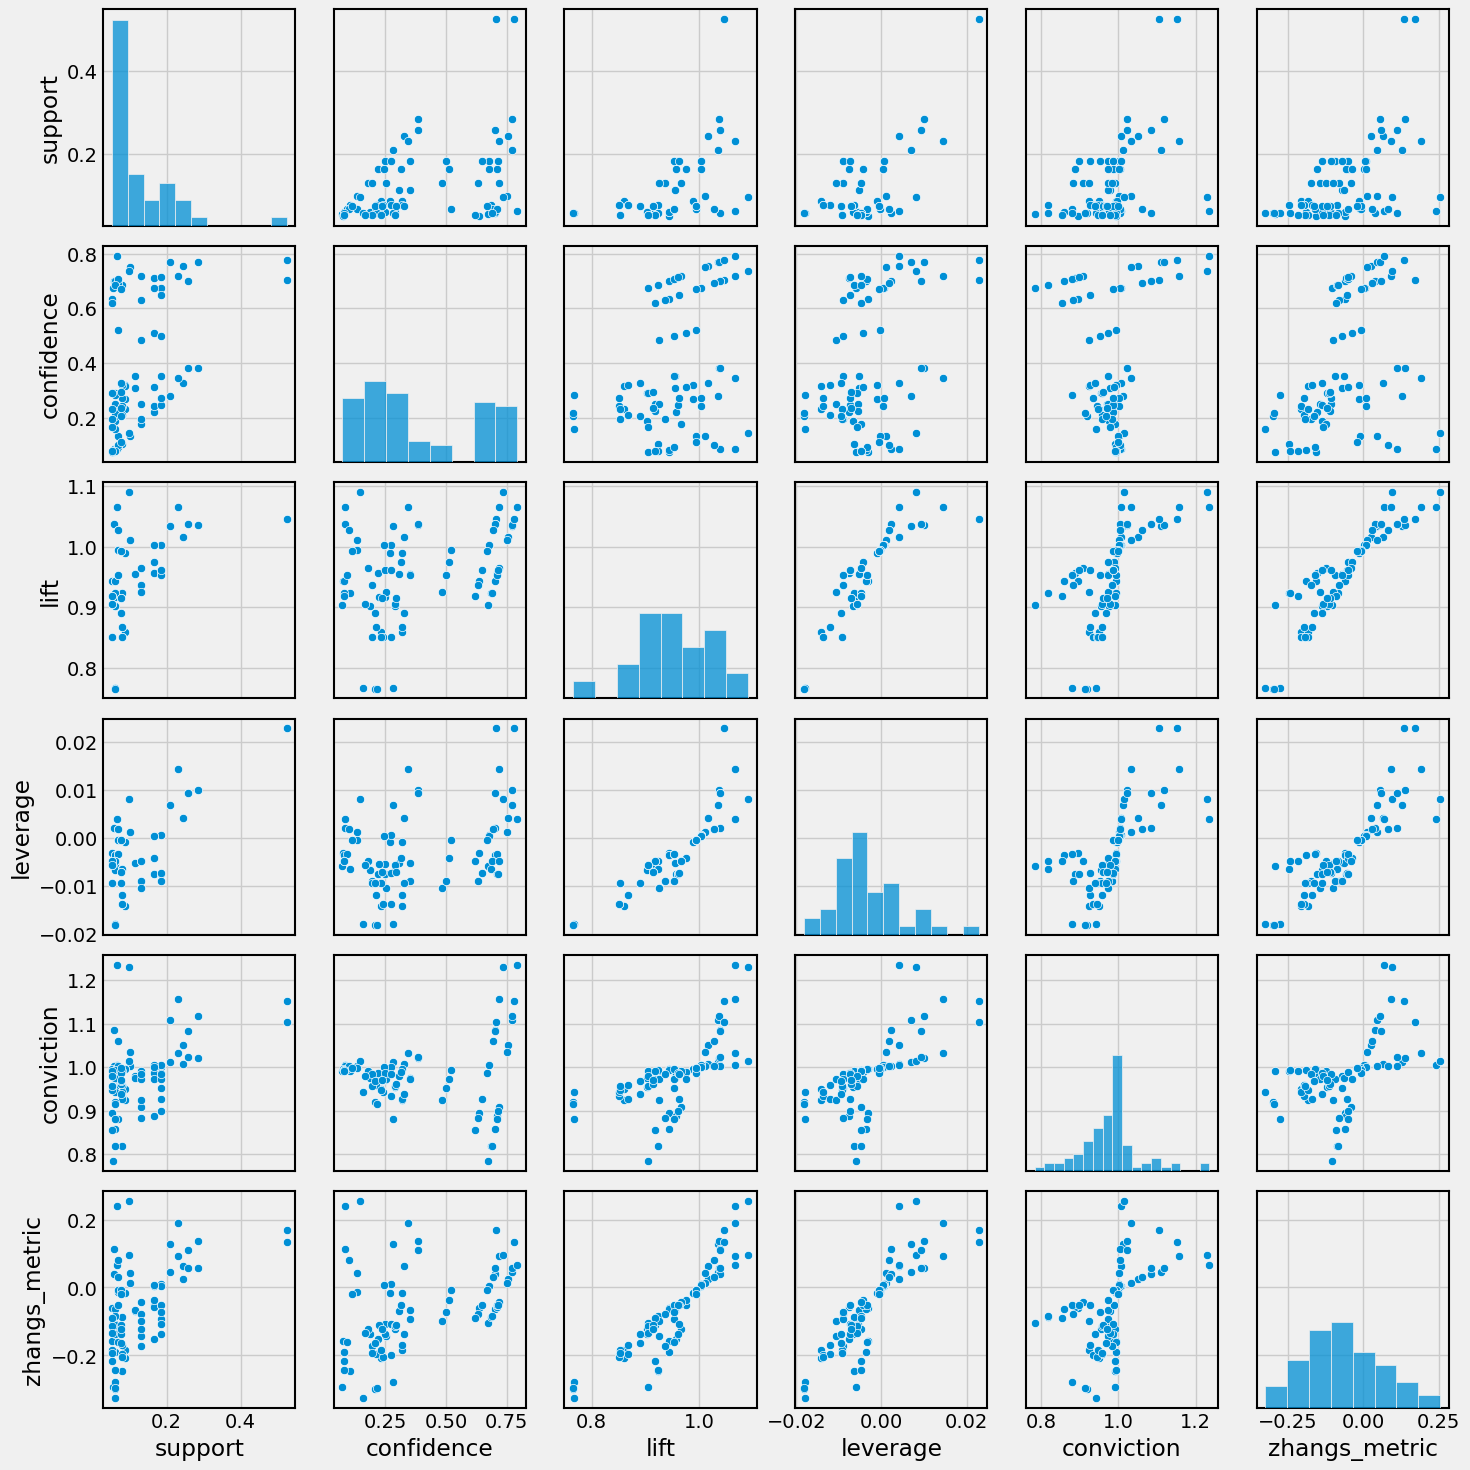

In [28]:
# Filter out extreme "plain bread" + "jam" rules
sans_toast = rules[rules['lift'] < 2.5]
sans_toast = sans_toast[sans_toast['conviction'] < 5]

# Create a pairplot matrix for the specified metrics, including A & C supports
g = sns.pairplot(sans_toast[cols])

# Add borders to each subplot (axes) in the pairplot
for ax in g.axes.flatten():
    for _, spine in ax.spines.items():
        spine.set_visible(True)  # Ensure spines are visible
        spine.set_linewidth(1.5)  # Set border line width
        spine.set_edgecolor('black')  # Set border color

# Show the plot
plt.show()

Considering our most basic MBA metrics first, we only see a weak-to-mid positive correlation for the interaction of Support and Confidence. As support is used as a foundation for essentially every other more complex metric, it tends to feature similar weak positive correlations elsewhere, each with some type of upward-sloping ceiling. Similarly, the confidence metric sees extremely weak or even non-existent correlations with other metrics.

There is some type of observable interaction between Lift, Leverage, Conviction, and Zhang's Metric. In the pairplot subplot for each of these, we generally see an "X"-like shape due to the centered and scaled nature of each metric around a central choke point (either 0 or 1). Comparing these subplots, the more linear and less dispersed a plot between two metrics is, the more aligned with each other those metrics are.

The relationship between Conviction and Zhang's metric is an example of two metrics that tend to differ on which values they consider to be extreme, resulting in a subplot with two legs spaced far apart. Rules with extreme (either *high* or *low*) conviction will have a less-extreme ZM, and rules with extreme ZM's will have less extreme conviction. Conviction, in general, tends to have relatively dispersed relations with lift and leverage as well, but to a lesser degree than with Zhang's metric.

The relationships between lift, leverage, and Zhang's metric are much tighter, indicating a closer agreement on significant rules between these metrics. Of particular interest is the relationship between lift and leverage, whose respective pairplot is almost linear. This makes sense, as the two metrics are extremely similar in nature. Both directly compare the observed and expected support for the occurrence of a given rule, but one via a ratio formula and the other via a difference formula. We should expect these two metrics to present similar conclusions for "important" rules.

#### Highest Confidence

As a reminder, confidence is highly related to and influenced by the *consequent's* individual support metric. We expect rules featuring high-support consequents to also have high confidence levels, regardless of rule reliability. To illustrate what I'm saying, here's the scatterplot of 'consequent support' vs 'confidence' for this basket data:

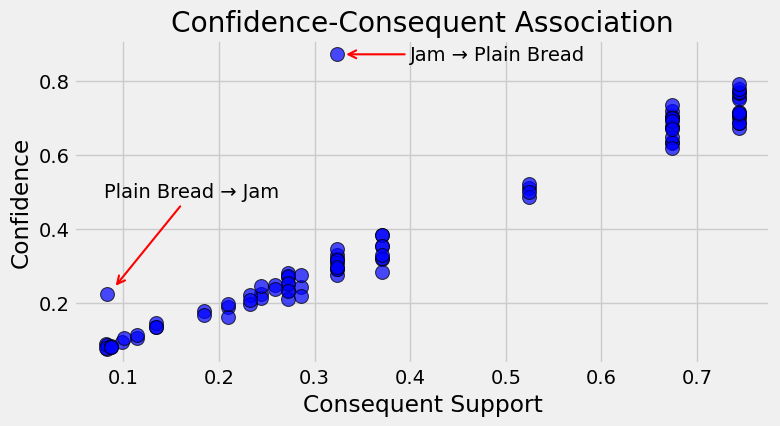

In [29]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(8, 4))
sns.scatterplot(x='consequent support', y='confidence', data=rules, color='b', edgecolor='k', s=100, alpha=0.7)

# Annotation parameters
annotations = [
    {"text": "Jam → Plain Bread", "xy": (0.33, 0.872727), "xytext": (0.4, 0.872727)},
    {"text": "Plain Bread → Jam", "xy": (0.09, 0.24), "xytext": (0.08, 0.5)},
]

# Annotation function, reiterated
for ann in annotations:
    plt.annotate(ann["text"],
                 xy=ann["xy"], xytext=ann["xytext"],
                 ha='left', va='center',
                 arrowprops=dict(arrowstyle="->", color='red', lw=1.5))

# Set the title and labels
plt.title("Confidence-Consequent Association")
plt.xlabel("Consequent Support")
plt.ylabel("Confidence")
plt.grid(True)

# Show the plot
plt.show()

Assuming that two itemsets are completely independent, the confidence is simply the probability of picking the consequent (i.e., the consequent support); this is why the line of best fit for the relationship between confidence and consequent support is essentially "y = x". These values are nearly the same in most other circumstances; the relationship between confidence and consequent support is *extremely* correlated. The further a rule lies outside of this line of correlation, the less independent the itemsets in the rule are.

This might be the best evidence for how much the association between plain bread and jam really stands out relative to all other rules in the dataset.

In [30]:
# Filter rules with high confidence
high_confidence_rules = rules[rules['confidence'] > 0.5].sort_values('confidence', ascending=False)

|    | antecedents                              | consequents                            |   antecedent support |   consequent support |   support |   confidence |     lift |     leverage |   conviction |   zhangs_metric |
|---:|:-----------------------------------------|:---------------------------------------|---------------------:|---------------------:|----------:|-------------:|---------:|-------------:|-------------:|----------------:|
| 14 | frozenset({'jam'})                       | frozenset({'plain bread'})             |            0.082925  |             0.323031 | 0.0723709 |     0.872727 | 2.70169  |  0.0455836   |     5.31905  |      0.686815   |
| 13 | frozenset({'refreshments'})              | frozenset({'angbutter'})               |            0.0817942 |             0.743686 | 0.0648323 |     0.792627 | 1.06581  |  0.00400304  |     1.236    |      0.0672447  |
| 11 | frozenset({'croissants'})                | frozenset({'angbutter'})               |            0.674331  |             0.743686 | 0.524312  |     0.777529 | 1.04551  |  0.0228214   |     1.15212  |      0.133652   |
|  9 | frozenset({'cakes'})                     | frozenset({'angbutter'})               |            0.370147  |             0.743686 | 0.285337  |     0.770876 | 1.03656  |  0.0100641   |     1.11867  |      0.0559984  |
|  6 | frozenset({'coffees'})                   | frozenset({'angbutter'})               |            0.272522  |             0.743686 | 0.209574  |     0.769018 | 1.03406  |  0.00690341  |     1.10967  |      0.0452799  |
|  1 | frozenset({'plain bread'})               | frozenset({'angbutter'})               |            0.323031  |             0.743686 | 0.244252  |     0.756126 | 1.01673  |  0.00401838  |     1.05101  |      0.0243021  |
|  5 | frozenset({'wiener'})                    | frozenset({'angbutter'})               |            0.133811  |             0.743686 | 0.100641  |     0.752113 | 1.01133  |  0.00112753  |     1.03399  |      0.0129342  |
| 25 | frozenset({'wiener'})                    | frozenset({'croissants'})              |            0.133811  |             0.674331 | 0.0983792 |     0.735211 | 1.09028  |  0.00814644  |     1.22992  |      0.0955987  |
| 20 | frozenset({'plain bread'})               | frozenset({'croissants'})              |            0.323031  |             0.674331 | 0.23219   |     0.718786 | 1.06593  |  0.0143605   |     1.15808  |      0.0913601  |
| 65 | frozenset({'coffees', 'croissants'})     | frozenset({'angbutter'})               |            0.18432   |             0.743686 | 0.132303  |     0.717791 | 0.96518  | -0.00477295  |     0.908242 |     -0.0423547  |
| 72 | frozenset({'croissants', 'cakes'})       | frozenset({'angbutter'})               |            0.258952  |             0.743686 | 0.185074  |     0.714702 | 0.961026 | -0.00750567  |     0.898405 |     -0.0518871  |
| 48 | frozenset({'plain bread', 'croissants'}) | frozenset({'angbutter'})               |            0.23219   |             0.743686 | 0.165096  |     0.711039 | 0.956101 | -0.00758041  |     0.887018 |     -0.0564258  |
| 53 | frozenset({'croissants', 'wiener'})      | frozenset({'angbutter'})               |            0.0983792 |             0.743686 | 0.0697324 |     0.708812 | 0.953106 | -0.00343089  |     0.880235 |     -0.0517456  |
| 10 | frozenset({'angbutter'})                 | frozenset({'croissants'})              |            0.743686  |             0.674331 | 0.524312  |     0.705018 | 1.04551  |  0.0228214   |     1.10403  |      0.169816   |
| 35 | frozenset({'coffees', 'plain bread'})    | frozenset({'angbutter'})               |            0.0870712 |             0.743686 | 0.0610629 |     0.701299 | 0.943003 | -0.00369075  |     0.858093 |     -0.0620953  |
| 22 | frozenset({'jam'})                       | frozenset({'croissants'})              |            0.082925  |             0.674331 | 0.0580475 |     0.7      | 1.03807  |  0.00212861  |     1.08556  |      0.0399859  |
| 31 | frozenset({'cakes'})                     | frozenset({'croissants'})              |            0.370147  |             0.674331 | 0.258952  |     0.699593 | 1.03746  |  0.00935055  |     1.08409  |      0.0573295  |
| 54 | frozenset({'angbutter', 'wiener'})       | frozenset({'croissants'})              |            0.100641  |             0.674331 | 0.0697324 |     0.692884 | 1.02751  |  0.00186718  |     1.06041  |      0.0297728  |
| 59 | frozenset({'coffees', 'cakes'})          | frozenset({'angbutter'})               |            0.0866943 |             0.743686 | 0.0595552 |     0.686957 | 0.923718 | -0.00491816  |     0.81878  |     -0.0829225  |
| 41 | frozenset({'plain bread', 'cakes'})      | frozenset({'angbutter'})               |            0.11421   |             0.743686 | 0.0784018 |     0.686469 | 0.923062 | -0.00653486  |     0.817506 |     -0.0860049  |
| 28 | frozenset({'coffees'})                   | frozenset({'croissants'})              |            0.272522  |             0.674331 | 0.18432   |     0.676349 | 1.00299  |  0.00054984  |     1.00623  |      0.00410058 |
| 46 | frozenset({'angbutter', 'plain bread'})  | frozenset({'croissants'})              |            0.244252  |             0.674331 | 0.165096  |     0.675926 | 1.00237  |  0.000389577 |     1.00492  |      0.00312233 |
|  2 | frozenset({'jam'})                       | frozenset({'angbutter'})               |            0.082925  |             0.743686 | 0.0557859 |     0.672727 | 0.904585 | -0.00588428  |     0.78318  |     -0.103153   |
| 82 | frozenset({'plain bread', 'cakes'})      | frozenset({'croissants'})              |            0.11421   |             0.674331 | 0.0765172 |     0.669967 | 0.993528 | -0.000498408 |     0.986777 |     -0.00729985 |
| 70 | frozenset({'angbutter', 'cakes'})        | frozenset({'croissants'})              |            0.285337  |             0.674331 | 0.185074  |     0.648613 | 0.961861 | -0.00733831  |     0.92681  |     -0.0525654  |
| 32 | frozenset({'refreshments'})              | frozenset({'croissants'})              |            0.0817942 |             0.674331 | 0.0520166 |     0.635945 | 0.943075 | -0.00313977  |     0.894559 |     -0.061683   |
| 64 | frozenset({'coffees', 'angbutter'})      | frozenset({'croissants'})              |            0.209574  |             0.674331 | 0.132303  |     0.631295 | 0.93618  | -0.00901923  |     0.883278 |     -0.0793981  |
| 76 | frozenset({'coffees', 'plain bread'})    | frozenset({'croissants'})              |            0.0870712 |             0.674331 | 0.0539012 |     0.619048 | 0.918018 | -0.00481359  |     0.854881 |     -0.0891049  |
| 57 | frozenset({'wiener'})                    | frozenset({'croissants', 'angbutter'}) |            0.133811  |             0.524312 | 0.0697324 |     0.521127 | 0.993925 | -0.000426233 |     0.993348 |     -0.00700722 |
| 50 | frozenset({'plain bread'})               | frozenset({'angbutter', 'croissants'}) |            0.323031  |             0.524312 | 0.165096  |     0.511085 | 0.974773 | -0.0042727   |     0.972946 |     -0.0368216  |

Filtering by high confidence alone generates a selection of good and bad rules. As such, it's better to filter by an additional metric. We could filter by lift or conviction levels greater than 1, or by leverage levels or Zhang's metrics greater than 0. We'll filter by lift values here.

In [31]:
# Filter rules with high confidence
high_confidence_rules_filtered = rules[(rules['confidence'] > 0.5) & (rules['lift'] > 1.0)].sort_values('confidence', ascending=False)

|    | antecedents                             | consequents                |   antecedent support |   consequent support |   support |   confidence |    lift |    leverage |   conviction |   zhangs_metric |
|---:|:----------------------------------------|:---------------------------|---------------------:|---------------------:|----------:|-------------:|--------:|------------:|-------------:|----------------:|
| 14 | frozenset({'jam'})                      | frozenset({'plain bread'}) |            0.082925  |             0.323031 | 0.0723709 |     0.872727 | 2.70169 | 0.0455836   |      5.31905 |      0.686815   |
| 13 | frozenset({'refreshments'})             | frozenset({'angbutter'})   |            0.0817942 |             0.743686 | 0.0648323 |     0.792627 | 1.06581 | 0.00400304  |      1.236   |      0.0672447  |
| 11 | frozenset({'croissants'})               | frozenset({'angbutter'})   |            0.674331  |             0.743686 | 0.524312  |     0.777529 | 1.04551 | 0.0228214   |      1.15212 |      0.133652   |
|  9 | frozenset({'cakes'})                    | frozenset({'angbutter'})   |            0.370147  |             0.743686 | 0.285337  |     0.770876 | 1.03656 | 0.0100641   |      1.11867 |      0.0559984  |
|  6 | frozenset({'coffees'})                  | frozenset({'angbutter'})   |            0.272522  |             0.743686 | 0.209574  |     0.769018 | 1.03406 | 0.00690341  |      1.10967 |      0.0452799  |
|  1 | frozenset({'plain bread'})              | frozenset({'angbutter'})   |            0.323031  |             0.743686 | 0.244252  |     0.756126 | 1.01673 | 0.00401838  |      1.05101 |      0.0243021  |
|  5 | frozenset({'wiener'})                   | frozenset({'angbutter'})   |            0.133811  |             0.743686 | 0.100641  |     0.752113 | 1.01133 | 0.00112753  |      1.03399 |      0.0129342  |
| 25 | frozenset({'wiener'})                   | frozenset({'croissants'})  |            0.133811  |             0.674331 | 0.0983792 |     0.735211 | 1.09028 | 0.00814644  |      1.22992 |      0.0955987  |
| 20 | frozenset({'plain bread'})              | frozenset({'croissants'})  |            0.323031  |             0.674331 | 0.23219   |     0.718786 | 1.06593 | 0.0143605   |      1.15808 |      0.0913601  |
| 10 | frozenset({'angbutter'})                | frozenset({'croissants'})  |            0.743686  |             0.674331 | 0.524312  |     0.705018 | 1.04551 | 0.0228214   |      1.10403 |      0.169816   |
| 22 | frozenset({'jam'})                      | frozenset({'croissants'})  |            0.082925  |             0.674331 | 0.0580475 |     0.7      | 1.03807 | 0.00212861  |      1.08556 |      0.0399859  |
| 31 | frozenset({'cakes'})                    | frozenset({'croissants'})  |            0.370147  |             0.674331 | 0.258952  |     0.699593 | 1.03746 | 0.00935055  |      1.08409 |      0.0573295  |
| 54 | frozenset({'angbutter', 'wiener'})      | frozenset({'croissants'})  |            0.100641  |             0.674331 | 0.0697324 |     0.692884 | 1.02751 | 0.00186718  |      1.06041 |      0.0297728  |
| 28 | frozenset({'coffees'})                  | frozenset({'croissants'})  |            0.272522  |             0.674331 | 0.18432   |     0.676349 | 1.00299 | 0.00054984  |      1.00623 |      0.00410058 |
| 46 | frozenset({'angbutter', 'plain bread'}) | frozenset({'croissants'})  |            0.244252  |             0.674331 | 0.165096  |     0.675926 | 1.00237 | 0.000389577 |      1.00492 |      0.00312233 |

Because of the close relationship between confidence and consequent support for independent itemsets, we see that angbutter and croissants appear as consequents among many instances of high-confidence basket combinations; this is because these items are the most commonly purchased items. We see that a lot of customers tend to purchase around 2 food items from some of the more common food categories, including both angbutter pastries and croissants. Of the people who buy any drink items, it is also fairly common to purchase an angbutter item to accompany it; this pattern does not seem to be as common with other food item combinations, but this may be due to the overshadowing nature of the angbutter item.

The only really strong rule that stands out in this group is "jam → plain bread", which has high measures in all other metrics. From a confidence standpoint, it makes a lot of sense that if someone purchases a packet of jam, they are almost certain to purchase some accompanying (likely bread-like) food to eat it with.

I'd also like to foreshadow future findings and highlight the item combination of wieners with croissants. There are two variants of this combination within this result set, but we will see the base "wiener → croissant" rule again going forward. This rule sees relatively high figures in both lift and conviction, and marginally high figures in all other non-support metrics.

#### Highest Lift

Lift is a good metric to rate the association of items in a rule, regardless of which direction the rule is oriented. This means that the rules "X → Y" and "Y → X" will have the same lift metric, and antecedent/consequent assignments are not as important. It's the grouping of two items as a whole that is being considered.

A reminder that lift measures the strength of the association between items using the ratio of a rule's Observed Support to its Expected Support. Rules with lift over 1 occur more often than would be expected by independent probability.

In [32]:
# Filter rules with high lift
high_lift_rules = rules[rules['lift'] > 1.03].sort_values('lift', ascending=False)

|    | antecedents                 | consequents                 |   antecedent support |   consequent support |   support |   confidence |    lift |   leverage |   conviction |   zhangs_metric |
|---:|:----------------------------|:----------------------------|---------------------:|---------------------:|----------:|-------------:|--------:|-----------:|-------------:|----------------:|
| 15 | frozenset({'plain bread'})  | frozenset({'jam'})          |            0.323031  |            0.082925  | 0.0723709 |    0.224037  | 2.70169 | 0.0455836  |      1.18185 |       0.930412  |
| 14 | frozenset({'jam'})          | frozenset({'plain bread'})  |            0.082925  |            0.323031  | 0.0723709 |    0.872727  | 2.70169 | 0.0455836  |      5.31905 |       0.686815  |
| 25 | frozenset({'wiener'})       | frozenset({'croissants'})   |            0.133811  |            0.674331  | 0.0983792 |    0.735211  | 1.09028 | 0.00814644 |      1.22992 |       0.0955987 |
| 24 | frozenset({'croissants'})   | frozenset({'wiener'})       |            0.674331  |            0.133811  | 0.0983792 |    0.145892  | 1.09028 | 0.00814644 |      1.01414 |       0.254266  |
| 20 | frozenset({'plain bread'})  | frozenset({'croissants'})   |            0.323031  |            0.674331  | 0.23219   |    0.718786  | 1.06593 | 0.0143605  |      1.15808 |       0.0913601 |
| 21 | frozenset({'croissants'})   | frozenset({'plain bread'})  |            0.674331  |            0.323031  | 0.23219   |    0.344326  | 1.06593 | 0.0143605  |      1.03248 |       0.189911  |
| 12 | frozenset({'angbutter'})    | frozenset({'refreshments'}) |            0.743686  |            0.0817942 | 0.0648323 |    0.0871769 | 1.06581 | 0.00400304 |      1.0059  |       0.240894  |
| 13 | frozenset({'refreshments'}) | frozenset({'angbutter'})    |            0.0817942 |            0.743686  | 0.0648323 |    0.792627  | 1.06581 | 0.00400304 |      1.236   |       0.0672447 |
| 10 | frozenset({'angbutter'})    | frozenset({'croissants'})   |            0.743686  |            0.674331  | 0.524312  |    0.705018  | 1.04551 | 0.0228214  |      1.10403 |       0.169816  |
| 11 | frozenset({'croissants'})   | frozenset({'angbutter'})    |            0.674331  |            0.743686  | 0.524312  |    0.777529  | 1.04551 | 0.0228214  |      1.15212 |       0.133652  |
| 23 | frozenset({'croissants'})   | frozenset({'jam'})          |            0.674331  |            0.082925  | 0.0580475 |    0.0860816 | 1.03807 | 0.00212861 |      1.00345 |       0.112599  |
| 22 | frozenset({'jam'})          | frozenset({'croissants'})   |            0.082925  |            0.674331  | 0.0580475 |    0.7       | 1.03807 | 0.00212861 |      1.08556 |       0.0399859 |
| 30 | frozenset({'croissants'})   | frozenset({'cakes'})        |            0.674331  |            0.370147  | 0.258952  |    0.384013  | 1.03746 | 0.00935055 |      1.02251 |       0.110877  |
| 31 | frozenset({'cakes'})        | frozenset({'croissants'})   |            0.370147  |            0.674331  | 0.258952  |    0.699593  | 1.03746 | 0.00935055 |      1.08409 |       0.0573295 |
|  8 | frozenset({'angbutter'})    | frozenset({'cakes'})        |            0.743686  |            0.370147  | 0.285337  |    0.38368   | 1.03656 | 0.0100641  |      1.02196 |       0.137608  |
|  9 | frozenset({'cakes'})        | frozenset({'angbutter'})    |            0.370147  |            0.743686  | 0.285337  |    0.770876  | 1.03656 | 0.0100641  |      1.11867 |       0.0559984 |
|  7 | frozenset({'angbutter'})    | frozenset({'coffees'})      |            0.743686  |            0.272522  | 0.209574  |    0.281804  | 1.03406 | 0.00690341 |      1.01293 |       0.128515  |
|  6 | frozenset({'coffees'})      | frozenset({'angbutter'})    |            0.272522  |            0.743686  | 0.209574  |    0.769018  | 1.03406 | 0.00690341 |      1.10967 |       0.0452799 |

We see that transactions featuring "plain bread + jam" occur *much* more frequently than would be expected from an independent pairing.

Additional pairings featured include:
  - "croissants + wiener"
  - "plain bread + croissants"
  - "refreshments + angbutter"
  - "cakes + croissants"
  - "croissants + angbutter"
  - "cakes + angbutter"
  - "coffees + angbutter"
  - "wiener + croissants"
  - "jam + croissants"

#### Highest Leverage

Remember that leverage is similar to lift in that both compare the Observed and Expected Support of a rule occurring in a transaction. However, leverage does so by performing a difference calculation, as opposed to the ratio calculated by lift. Rules with a positive leverage statistic occur more often than expected. Like lift, the item-pair reciprocals are given the same leverage metric regardless of direction.

In [33]:
# Filter rules with high leverage
high_leverage_rules = rules[rules['leverage'] > 0.01].sort_values('leverage', ascending=False)

|    | antecedents                | consequents                |   antecedent support |   consequent support |   support |   confidence |    lift |   leverage |   conviction |   zhangs_metric |
|---:|:---------------------------|:---------------------------|---------------------:|---------------------:|----------:|-------------:|--------:|-----------:|-------------:|----------------:|
| 14 | frozenset({'jam'})         | frozenset({'plain bread'}) |             0.082925 |             0.323031 | 0.0723709 |     0.872727 | 2.70169 |  0.0455836 |      5.31905 |       0.686815  |
| 15 | frozenset({'plain bread'}) | frozenset({'jam'})         |             0.323031 |             0.082925 | 0.0723709 |     0.224037 | 2.70169 |  0.0455836 |      1.18185 |       0.930412  |
| 10 | frozenset({'angbutter'})   | frozenset({'croissants'})  |             0.743686 |             0.674331 | 0.524312  |     0.705018 | 1.04551 |  0.0228214 |      1.10403 |       0.169816  |
| 11 | frozenset({'croissants'})  | frozenset({'angbutter'})   |             0.674331 |             0.743686 | 0.524312  |     0.777529 | 1.04551 |  0.0228214 |      1.15212 |       0.133652  |
| 20 | frozenset({'plain bread'}) | frozenset({'croissants'})  |             0.323031 |             0.674331 | 0.23219   |     0.718786 | 1.06593 |  0.0143605 |      1.15808 |       0.0913601 |
| 21 | frozenset({'croissants'})  | frozenset({'plain bread'}) |             0.674331 |             0.323031 | 0.23219   |     0.344326 | 1.06593 |  0.0143605 |      1.03248 |       0.189911  |
|  8 | frozenset({'angbutter'})   | frozenset({'cakes'})       |             0.743686 |             0.370147 | 0.285337  |     0.38368  | 1.03656 |  0.0100641 |      1.02196 |       0.137608  |
|  9 | frozenset({'cakes'})       | frozenset({'angbutter'})   |             0.370147 |             0.743686 | 0.285337  |     0.770876 | 1.03656 |  0.0100641 |      1.11867 |       0.0559984 |

Many of the rules identified in the high-leverage results mirror those found in the high-lift analysis. At the top of the list are the various rule permutations involving "plain bread" and "jam," which consistently demonstrate strong associations across multiple metrics. Additionally, several other rules feature combinations of high-support items such as "angbutter," "croissants," and "cakes," reflecting their frequent co-occurrence in customer transactions. 

#### Highest Conviction

Reviewing our earlier formula definitions, we know that conviction analyzes the likelihood that a consequent will *not* occur in the wake of an antecedent occurring. From the dispersal patterns in the earlier pairplot, we also saw a significant amount of *disagreement* regarding the conviction metric's relationship with other MBA metrics, such as lift, leverage, and Zhang's Metric. Because of this, conviction seems to be a great contrast for rule findings present in other metrics.

In [34]:
# Filter rules with high conviction
high_conviction_rules = rules[rules['conviction'] > 1.1].sort_values('conviction', ascending=False)

|    | antecedents                 | consequents                |   antecedent support |   consequent support |   support |   confidence |    lift |   leverage |   conviction |   zhangs_metric |
|---:|:----------------------------|:---------------------------|---------------------:|---------------------:|----------:|-------------:|--------:|-----------:|-------------:|----------------:|
| 14 | frozenset({'jam'})          | frozenset({'plain bread'}) |            0.082925  |             0.323031 | 0.0723709 |     0.872727 | 2.70169 | 0.0455836  |      5.31905 |       0.686815  |
| 13 | frozenset({'refreshments'}) | frozenset({'angbutter'})   |            0.0817942 |             0.743686 | 0.0648323 |     0.792627 | 1.06581 | 0.00400304 |      1.236   |       0.0672447 |
| 25 | frozenset({'wiener'})       | frozenset({'croissants'})  |            0.133811  |             0.674331 | 0.0983792 |     0.735211 | 1.09028 | 0.00814644 |      1.22992 |       0.0955987 |
| 15 | frozenset({'plain bread'})  | frozenset({'jam'})         |            0.323031  |             0.082925 | 0.0723709 |     0.224037 | 2.70169 | 0.0455836  |      1.18185 |       0.930412  |
| 20 | frozenset({'plain bread'})  | frozenset({'croissants'})  |            0.323031  |             0.674331 | 0.23219   |     0.718786 | 1.06593 | 0.0143605  |      1.15808 |       0.0913601 |
| 11 | frozenset({'croissants'})   | frozenset({'angbutter'})   |            0.674331  |             0.743686 | 0.524312  |     0.777529 | 1.04551 | 0.0228214  |      1.15212 |       0.133652  |
|  9 | frozenset({'cakes'})        | frozenset({'angbutter'})   |            0.370147  |             0.743686 | 0.285337  |     0.770876 | 1.03656 | 0.0100641  |      1.11867 |       0.0559984 |
|  6 | frozenset({'coffees'})      | frozenset({'angbutter'})   |            0.272522  |             0.743686 | 0.209574  |     0.769018 | 1.03406 | 0.00690341 |      1.10967 |       0.0452799 |
| 10 | frozenset({'angbutter'})    | frozenset({'croissants'})  |            0.743686  |             0.674331 | 0.524312  |     0.705018 | 1.04551 | 0.0228214  |      1.10403 |       0.169816  |

Conviction prioritizes several interesting and insightful rules over those associated with high-support itemsets. Both "jam + plain bread" rules exhibit high conviction levels, with the "jam → plain bread" rule standing out as having the highest conviction of all—suggesting it is a particularly reliable rule.

The "wiener → croissants" rule also has a high conviction value, whereas its reciprocal is significantly lower at approximately 1.01 and is therefore not included in the results. A similar pattern appears for the "refreshments → angbutter" and "coffees → angbutter" rules; while their reciprocals have lower conviction values, they are still above 1.

In contrast, the reciprocals of the "plain bread → croissants", "croissants → angbutter", and "cakes → angbutter" rules are also lower than their corresponding included conviction levels, but not as low as those of the previously mentioned rules.

#### Highest Zhang Metrics

The above Zhang's metric plot seems to mostly adhere to a normal distribution, with two notable outliers at around 0.7 and 0.9. Since Zhang's metric can only sit between values of -1 and 1, a 0.9 and 0.7 metric would both be very significant. We'll filter by Zhang's metric values over 0.1 so that we can see the outliers in addition to the rules on the upper tail of the Zhang's metric bell curve.

In [35]:
# Filter rules with high zhangs_metric
high_zm_rules = rules[rules['zhangs_metric'] > 0.1].sort_values('zhangs_metric', ascending=False)

|    | antecedents                | consequents                 |   antecedent support |   consequent support |   support |   confidence |    lift |   leverage |   conviction |   zhangs_metric |
|---:|:---------------------------|:----------------------------|---------------------:|---------------------:|----------:|-------------:|--------:|-----------:|-------------:|----------------:|
| 15 | frozenset({'plain bread'}) | frozenset({'jam'})          |             0.323031 |            0.082925  | 0.0723709 |    0.224037  | 2.70169 | 0.0455836  |      1.18185 |        0.930412 |
| 14 | frozenset({'jam'})         | frozenset({'plain bread'})  |             0.082925 |            0.323031  | 0.0723709 |    0.872727  | 2.70169 | 0.0455836  |      5.31905 |        0.686815 |
| 24 | frozenset({'croissants'})  | frozenset({'wiener'})       |             0.674331 |            0.133811  | 0.0983792 |    0.145892  | 1.09028 | 0.00814644 |      1.01414 |        0.254266 |
| 12 | frozenset({'angbutter'})   | frozenset({'refreshments'}) |             0.743686 |            0.0817942 | 0.0648323 |    0.0871769 | 1.06581 | 0.00400304 |      1.0059  |        0.240894 |
| 21 | frozenset({'croissants'})  | frozenset({'plain bread'})  |             0.674331 |            0.323031  | 0.23219   |    0.344326  | 1.06593 | 0.0143605  |      1.03248 |        0.189911 |
| 10 | frozenset({'angbutter'})   | frozenset({'croissants'})   |             0.743686 |            0.674331  | 0.524312  |    0.705018  | 1.04551 | 0.0228214  |      1.10403 |        0.169816 |
|  8 | frozenset({'angbutter'})   | frozenset({'cakes'})        |             0.743686 |            0.370147  | 0.285337  |    0.38368   | 1.03656 | 0.0100641  |      1.02196 |        0.137608 |
| 11 | frozenset({'croissants'})  | frozenset({'angbutter'})    |             0.674331 |            0.743686  | 0.524312  |    0.777529  | 1.04551 | 0.0228214  |      1.15212 |        0.133652 |
|  7 | frozenset({'angbutter'})   | frozenset({'coffees'})      |             0.743686 |            0.272522  | 0.209574  |    0.281804  | 1.03406 | 0.00690341 |      1.01293 |        0.128515 |
| 23 | frozenset({'croissants'})  | frozenset({'jam'})          |             0.674331 |            0.082925  | 0.0580475 |    0.0860816 | 1.03807 | 0.00212861 |      1.00345 |        0.112599 |
| 30 | frozenset({'croissants'})  | frozenset({'cakes'})        |             0.674331 |            0.370147  | 0.258952  |    0.384013  | 1.03746 | 0.00935055 |      1.02251 |        0.110877 |

The Zhang metric appears to place additional emphasis on the reciprocals of rules that typically have lower values across other metrics compared to their counterparts. This allows us to closely examine the other side of some of the more interesting rules observed in prior metrics—rules that were otherwise excluded due to lower support and confidence values.

We can observe that both outliers identified by the Zhang metric are rule variants involving the "jam + plain bread" item pair. This suggests that these two items are strongly associated within the bakery. Additionally, both "wiener + croissants" rules have high Zhang metric values, with the "croissants → wiener" rule reaching a notable 0.27. The "angbutter → refreshments" rule follows closely behind at 0.24, which is still considered relatively high within this set of rules.

## Conclusions

### Bread with Jam

Perhaps the most supported rule that we can take away from our set of rules is the association between "plain bread" and "jam". Bread/toast with jam is a pretty intuitive item combination, so it's not difficult to see why these two items together see high levels across all association metrics in at least one direction. The confidence and conviction levels are particularly high for the rule "if jam, then plain bread", as it's pretty logical that if a person buys jam, they will often seek an item to spread it on; in most instances, this item is bread or toast. It's not as sure of a rule in the opposite direction, as only some people who buy bread will also buy jam. This could be for a number of reasons, but it wouldn't hurt to raise a recommendation for upselling jam items to all bread buyers. This could potentially inform customers of the availability of jam as a complementary item, and there's reason to believe this could boost the sales of jam, and potentially even both items together as a combo.

### Item Bundles/Combos

A number of less notable, supported rules exist between combinations of popular items, such as angbutter bread, plain bread, one of the many different croissants, or cake products. In these instances, it may be beneficial to organize a number of different campaigns to drive sales across product categories, including BOGO bundling, item combos, and cross-promotion. Noting that angbutter is a top-selling item, and that angbutter purchases often coincide with different drink purchases (both "refreshments" and "coffees"), creating a food-and-drink combo for angbutter buyers might be a terrific idea to drive sales in either category. Additionally, given that the bakery is not open on Tuesdays, a creative and sustainability-driven marketing campaign could involve silent BOGO bundling (think: "buy one, get an extra item free 'accidentally'"); this could have the dual benefit of minimizing waste from supply spoilage during weekly closures and could also act as item sampling for potential customers who would otherwise not try some item at a cost.

### Pig in a Blanket?

Aside from jam-associated rules, rules between high-support items, and rules between angbutter and drink items, the other noteworthy rule category observed is between the items "croissants" and "wiener". Here, the "wiener" item refers to a type of sausage bread (as stated by the uploader), but the specific qualities are not clear. However, it would be smart to further investigate the reason for association for these items. I like to think that maybe each "wiener" item has an excess in sausage, and that customers are using the excess to make little pigs in a blanket; I should note that this is pure head-canon. Whatever the reason for the association, it could lead to the creation of a revolutionary new top-selling item or an improved version of an old favorite.